<a href="https://colab.research.google.com/github/omk42/Pattern-Mining/blob/master/mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path
import os

**Configurations**

In [0]:
# ROOT = '/content/drive/My Drive/MDPM/'

conf_dataset = 'shoes_trim'
# conf_imgDir = ROOT + 'data/' + conf_dataset
conf_numClasses = 1
conf_numSamples = 100

conf_numTopActivation = 20
conf_supp = 0.1
conf_minLength = 16
conf_maxLength = 18
conf_confid = 30

### FOR REMOTE
# conf_cnnFeatures = ROOT + 'output/' + conf_dataset + '/cnnFeatures.npy'
# conf_invertFile = ROOT + 'output/' + conf_dataset + '/invertFile.npy'
# conf_inputFile = ROOT + 'output/' + conf_dataset + '/transFile.txt'
# conf_appFile = ROOT + 'mining/appFile.txt'
# conf_outputFile = ROOT + 'output/' + conf_dataset + '/rule.txt'

### FOR LOCAL
ROOT = './MDPM_python/'
conf_output = ROOT + 'shoes_trim_fc7/'
conf_cnnFeatures = conf_output + 'cnnFeatures.npy'
conf_appFile = ROOT + 'appFile.txt'
conf_invertFile = conf_output + 'invertFile.npy'
conf_inputFile = conf_output + 'transFile.txt'
conf_outputFile = conf_output + 'rule' + '{}m{}n{}q2'.format(str(conf_supp).replace(".", "p"), conf_minLength, conf_maxLength) + '.txt'
conf_apriori = '/Users/omkarpathak/School/Research/MDPM/mining/apriorifolder/apriori/src/apriori'

In [0]:
def getInvertFileCls(classID):
  with open (conf_cnnFeatures, 'rb') as f:
    label_cnnFea = np.load (f)
  
  feaSorted = -np.sort(-label_cnnFea, axis=0)
  feaIndex = np.argsort(-label_cnnFea, axis=0)
  invertFile = np.zeros(label_cnnFea.shape)
  
  for i in range(invertFile.shape[1]):
    invertFile[feaIndex[:conf_numTopActivation,i].T, i] = 1
  # print (label_cnnFea, invertFile)
  
  with open(conf_invertFile, 'wb') as f:
    np.save(f, invertFile)

  pos = '4097'
  with open(conf_inputFile,'w') as f:
    for i in range(invertFile.shape[1]):
      for j in np.nonzero(invertFile[:,i])[0]:
        f.write(" "+str(j)) 
      f.write(" "+pos)
      f.write("\n")  

In [32]:
for i in range(1,conf_numClasses+1):
  print ("Combining level 1 CNN feature of class ", i)
  getInvertFileCls(i)

Combining level 1 CNN feature of class  1


In [0]:
os.environ["conf_minLength"] = str(conf_minLength)
os.environ["conf_maxLength"] = str(conf_maxLength)
os.environ["conf_confid"] = str(conf_confid)
os.environ["conf_supp"] = str(conf_supp)
os.environ["conf_inputFile"] = conf_inputFile
os.environ["conf_appFile"] = conf_appFile
os.environ["conf_apriori"] = conf_apriori
os.environ["conf_outputFile"] = conf_outputFile

In [24]:
!echo $conf_apriori
# !chmod 755 $conf_apriori
!$conf_apriori -tr -s$conf_supp -m$conf_minLength -n$conf_maxLength -q2 -c$conf_confid -R$conf_appFile $conf_inputFile $conf_outputFile

/Users/omkarpathak/School/Research/MDPM/mining/apriorifolder/apriori/src/apriori
/Users/omkarpathak/School/Research/MDPM/mining/apriorifolder/apriori/src/apriori - find frequent item sets with the apriori algorithm
version 6.28 (2019.03.31)        (c) 1996-2019   Christian Borgelt
reading ./MDPM_python/appFile.txt ... [1 item(s)] done [0.00s].
reading ./MDPM_python/shoes_trim_fc7/transFile.txt ... [1997 item(s), 23309 transaction(s)] done [0.03s].
filtering, sorting and recoding items ... [1163 item(s)] done [0.00s].
sorting and reducing transactions ... [22220/23309 transaction(s)] done [0.01s].
building transaction tree ... [33123 node(s)] done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 done [249.22s].
writing ./MDPM_python/shoes_trim_fc7/rule0p1m16n18q2.txt ... [16961 rule(s)] done [73.86s].


Apriori command for Remote runtime



In [0]:
%%shell
cd "/content/drive/My Drive/MDPM/mining/apriori/apriori/src"
# chmod 755 "apriori"
./apriori -tr -s0.1 -m16 -n18 -q2 -c30 -R"/content/drive/My Drive/MDPM/mining/appFile.txt" "/content/drive/My Drive/MDPM/output/shoes_trim/transFile.txt" "/content/drive/My Drive/MDPM/output/shoes_trim/rulep1m16n18q2.txt"

Test if invertFiles are correctly made

In [0]:
conf_cnnFeatures = ROOT + 'scratch/test_arr.npy'
conf_inputFile = ROOT + 'scratch/transFile.txt'
conf_numTopActivation = 4

In [45]:
test_arr = np.array ([[0,34,23,56,23,9,3,21,56,7],[3,66,84,235,6778,324,74,2,1,567],[3,5,63,45,23,56,323,565,43,7]])
test_arr = test_arr.T 
np.save('/content/drive/My Drive/MDPM/scratch/test_arr.npy', test_arr)
print (test_arr)
getInvertFileCls(1)

[[   0    3    3]
 [  34   66    5]
 [  23   84   63]
 [  56  235   45]
 [  23 6778   23]
 [   9  324   56]
 [   3   74  323]
 [  21    2  565]
 [  56    1   43]
 [   7  567    7]]
/content/drive/My Drive/MDPM/scratch/test_arr.npy
[[   0    3    3]
 [  34   66    5]
 [  23   84   63]
 [  56  235   45]
 [  23 6778   23]
 [   9  324   56]
 [   3   74  323]
 [  21    2  565]
 [  56    1   43]
 [   7  567    7]] [[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


Test if features for similar patches

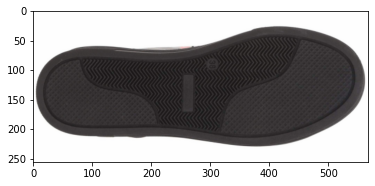

66 11810


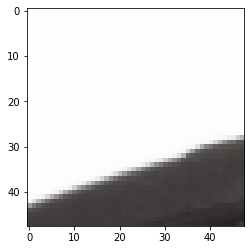

(array([ 161,  309,  528,  919,  970, 1088, 1419, 1420, 1724, 1885, 2068,
       2418, 2589, 2859, 3143, 3346, 3497, 3676, 3772, 3810]),)
(array([ 269,  282,  384,  427,  446, 1149, 1199, 1552, 1918, 2256, 2636,
       2682, 3069, 3240, 3309, 3486, 3509, 3513, 3638, 3721]),)


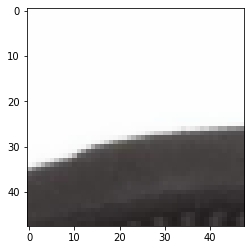

(array([ 161,  309,  528,  919,  970, 1088, 1419, 1420, 1724, 1885, 2068,
       2418, 2589, 2859, 3143, 3346, 3497, 3676, 3772, 3810]),)
(array([ 269,  282,  384,  427,  446, 1149, 1199, 1552, 1918, 2256, 2636,
       2682, 3069, 3240, 3309, 3486, 3509, 3513, 3638, 3721]),)


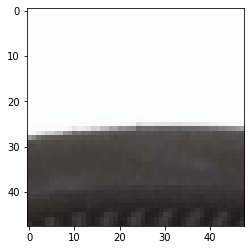

(array([ 161,  254,  309,  528,  616,  919, 1088, 1683, 1724, 2068, 2266,
       2465, 2589, 2859, 3143, 3265, 3651, 3772, 3810, 4036]),)
(array([ 269,  384,  446,  790, 1149, 1199, 1552, 1918, 2176, 2256, 2406,
       3069, 3240, 3309, 3509, 3638, 3678, 3691, 3721, 3757]),)


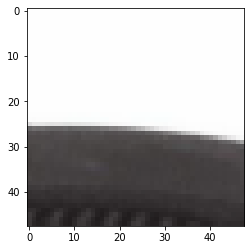

(array([ 161,  309,  390,  528,  616, 1088, 1420, 1724, 2068, 2169, 2589,
       2591, 3143, 3265, 3602, 3651, 3682, 3772, 3812, 4036]),)
(array([ 269,  384,  402,  446,  790, 1149, 1316, 1552, 1877, 1918, 2406,
       3069, 3240, 3486, 3509, 3638, 3691, 3721, 3757, 4066]),)


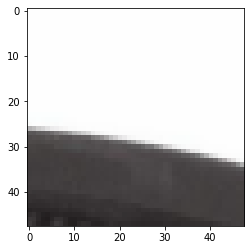

(array([ 309,  390, 1088, 1420, 1469, 1724, 1763, 2068, 2127, 2169, 2589,
       2591, 2777, 2859, 3143, 3265, 3651, 3772, 3896, 4036]),)
(array([ 269,  353,  384,  446,  790,  944, 1149, 1199, 1316, 1552, 1642,
       1877, 1918, 2682, 3069, 3240, 3509, 3638, 3691, 3721]),)


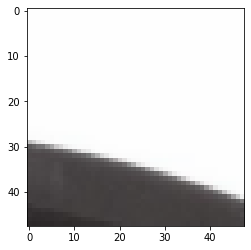

(array([ 200,  390,  495,  953, 1088, 1420, 1469, 1724, 1763, 2068, 2127,
       2169, 2589, 2591, 2859, 3143, 3265, 3651, 3772, 4036]),)
(array([ 269,  353,  446,  790,  944, 1149, 1199, 1531, 1544, 1552, 1642,
       2633, 3069, 3240, 3309, 3509, 3638, 3691, 3721, 3902]),)


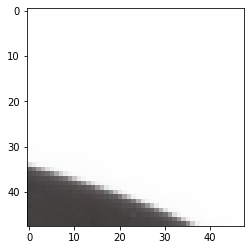

(array([ 953, 1088, 1420, 1469, 1632, 1724, 1763, 2068, 2127, 2169, 2491,
       2589, 2591, 2859, 3143, 3188, 3265, 3651, 3772, 3890]),)
(array([ 269,  282,  446,  944, 1149, 1531, 1544, 1552, 1857, 2266, 2633,
       2805, 3069, 3240, 3509, 3514, 3560, 3721, 3791, 3902]),)


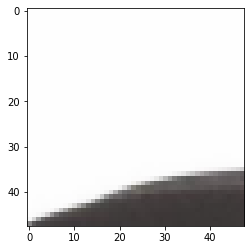

(array([ 191,  953, 1088, 1420, 1632, 1724, 1885, 2068, 2127, 2169, 2458,
       2491, 2589, 2591, 3188, 3265, 3346, 3602, 3772, 3890]),)
(array([ 269,  282,  297,  446,  753,  867, 1199, 1316, 1688, 1918, 2633,
       2758, 2933, 3069, 3240, 3509, 3513, 3638, 3721, 4066]),)


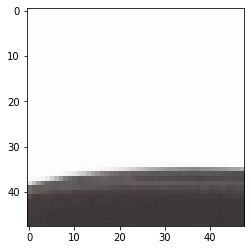

(array([  88,  156,  552,  815, 1088, 1372, 1420, 1724, 1759, 1885, 2068,
       2169, 2182, 2484, 2491, 2901, 3265, 3346, 3890, 4014]),)
(array([ 109,  269,  282,  384,  446,  768,  944, 1149, 1316, 1918, 2633,
       2682, 3069, 3240, 3509, 3513, 3638, 3721, 3757, 4066]),)


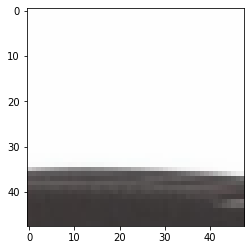

(array([ 108,  216,  528,  618,  867,  919, 1088, 1420, 1724, 2068, 2072,
       2169, 2589, 2859, 3143, 3265, 3497, 3532, 3762, 3772]),)
(array([ 269,  282,  318,  384,  446,  790,  944, 1149, 1316, 1544, 1918,
       2758, 2996, 3069, 3240, 3509, 3638, 3721, 3757, 4066]),)


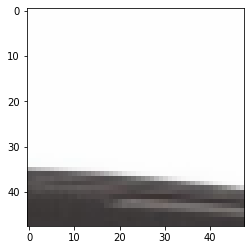

(array([ 495,  867,  919,  943,  953, 1088, 1420, 1632, 1724, 2068, 2072,
       2169, 2589, 2859, 3143, 3265, 3532, 3602, 3762, 3772]),)
(array([ 269,  282,  384,  446,  790,  854,  944, 1149, 1268, 1316, 1544,
       1552, 2996, 3069, 3240, 3509, 3638, 3721, 3757, 4066]),)


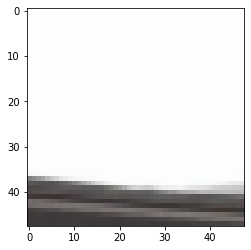

(array([ 300,  359,  953, 1088, 1420, 1632, 1724, 2068, 2169, 2221, 2589,
       2697, 2859, 3143, 3265, 3346, 3408, 3512, 3772, 3896]),)
(array([ 269,  282,  446,  637,  790,  854,  944, 1149, 1544, 1701, 1918,
       2323, 2996, 3069, 3240, 3509, 3638, 3721, 3757, 4066]),)


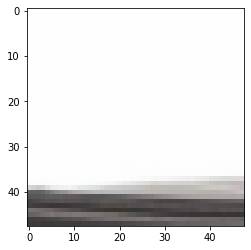

(array([ 196,  390,  578,  919,  953, 1038, 1088, 1247, 1420, 1632, 1724,
       1763, 2068, 2072, 2169, 3143, 3265, 3512, 3772, 3977]),)
(array([ 269,  282,  384,  446,  790,  854,  944, 1149, 1199, 1544, 1701,
       1918, 2758, 2996, 3240, 3509, 3638, 3721, 3757, 4066]),)


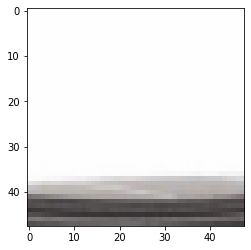

(array([ 390,  528,  919, 1088, 1247, 1420, 1724, 1885, 2064, 2068, 2072,
       2169, 2589, 3143, 3265, 3532, 3602, 3772, 3810, 3890]),)
(array([ 269,  282,  318,  790,  944, 1149, 1199, 1544, 1701, 1918, 2758,
       2996, 3069, 3240, 3509, 3634, 3638, 3721, 3757, 4066]),)


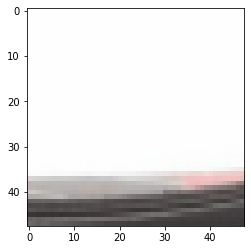

(array([ 892,  919,  953, 1088, 1247, 1420, 1632, 1724, 1763, 1885, 2068,
       2169, 2200, 2589, 2948, 3265, 3651, 3772, 3896, 4036]),)
(array([ 269,  282,  318,  944, 1199, 1316, 1544, 1701, 1918, 2188, 2758,
       2996, 3069, 3240, 3509, 3634, 3638, 3721, 3757, 4066]),)


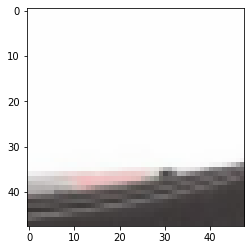

(array([ 359,  919, 1088, 1247, 1420, 1724, 1763, 1885, 2068, 2169, 2192,
       2200, 2948, 3188, 3265, 3602, 3651, 3772, 3896, 4036]),)
(array([ 109,  154,  269,  282,  446,  854, 1199, 1268, 1316, 1552, 1918,
       2188, 2524, 3069, 3240, 3509, 3638, 3721, 3757, 4066]),)


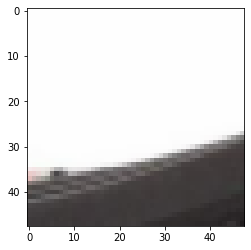

(array([ 209,  578,  788, 1088, 1420, 1516, 1559, 1724, 1939, 2068, 2169,
       2591, 2859, 2948, 3143, 3188, 3532, 3651, 3810, 4036]),)
(array([ 269,  282,  446,  790,  932,  944, 1149, 1199, 1316, 1552, 1688,
       1918, 2758, 3069, 3240, 3509, 3634, 3638, 3721, 3757]),)


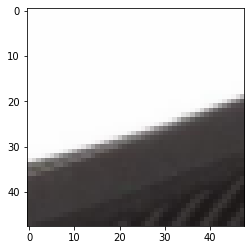

(array([  82,  216,  309,  680,  788,  919, 1088, 1516, 1559, 1724, 1885,
       2127, 2755, 2859, 2994, 3143, 3346, 3391, 3651, 3810]),)
(array([ 269,  282,  402,  427,  446,  854,  944, 1552, 1688, 1918, 1982,
       2176, 2419, 2758, 3069, 3240, 3509, 3634, 3638, 3831]),)


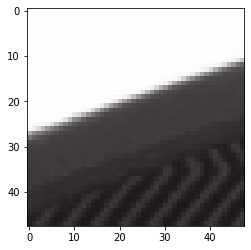

(array([ 216,  254,  309,  528, 1010, 1088, 1516, 1724, 1885, 2673, 2755,
       2859, 2994, 3143, 3197, 3265, 3602, 3633, 3810, 4034]),)
(array([ 269,  446,  854, 1087, 1149, 1268, 1552, 1688, 1907, 1918, 1982,
       2179, 2256, 2419, 2758, 3069, 3240, 3638, 3678, 3831]),)


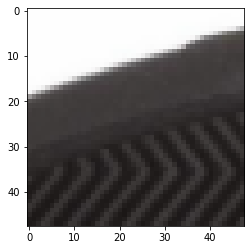

(array([ 161,  309, 1010, 1088, 1514, 1689, 1724, 1824, 1881, 1987, 2079,
       2803, 2859, 3143, 3265, 3408, 3772, 3810, 3872, 4036]),)
(array([ 154,  269,  353,  768,  854, 1268, 1424, 1552, 1907, 1982, 2053,
       2140, 2179, 2256, 2419, 3240, 3486, 3560, 3638, 3831]),)


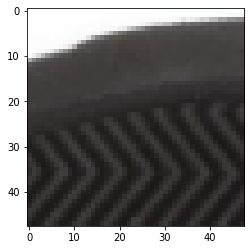

(array([ 161,  309, 1088, 1419, 1420, 1689, 1724, 1775, 1987, 2079, 2467,
       2591, 2859, 2937, 2984, 3143, 3265, 3547, 3810, 3812]),)
(array([ 154,  269,  768,  828,  862,  944, 1183, 1268, 1552, 1907, 1982,
       2140, 2188, 2419, 3140, 3240, 3560, 3638, 3678, 3831]),)


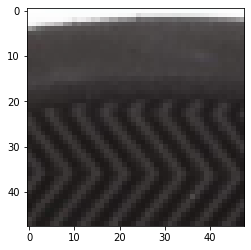

(array([ 161,  309, 1088, 1420, 1653, 1689, 1724, 1987, 2079, 2467, 2591,
       2859, 2937, 3143, 3265, 3547, 3651, 3810, 3982, 4036]),)
(array([ 154,  269,  282,  353,  828,  862,  944, 1057, 1183, 1268, 1424,
       1982, 2188, 2956, 3140, 3240, 3509, 3638, 3678, 3831]),)


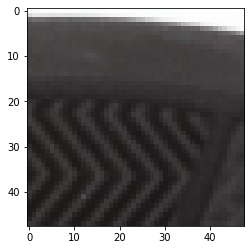

(array([  88,  154,  161,  309, 1088, 1420, 1689, 1724, 2068, 2206, 2467,
       2591, 2859, 3143, 3265, 3391, 3547, 3810, 3982, 4036]),)
(array([ 154,  203,  269,  282,  318,  768,  828, 1199, 1268, 1424, 2188,
       2524, 2956, 3082, 3240, 3509, 3638, 3678, 3721, 3831]),)


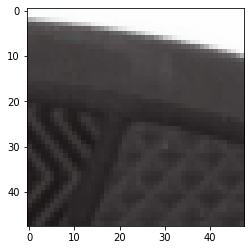

(array([ 153,  751, 1088, 1602, 1724, 2068, 2169, 2206, 2380, 2467, 2589,
       2591, 2859, 3143, 3265, 3391, 3744, 3881, 3896, 4058]),)
(array([ 269,  282,  353,  944, 1027, 1087, 1199, 1302, 1424, 2060, 2188,
       2956, 3240, 3243, 3509, 3638, 3678, 3691, 3721, 3757]),)


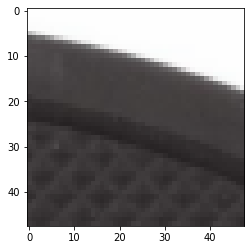

(array([ 153,  161,  751, 1088, 1724, 1775, 2068, 2169, 2206, 2279, 2467,
       2572, 2589, 2591, 2731, 2859, 3143, 3265, 3795, 3881]),)
(array([ 269,  282,  446,  854, 1027, 1087, 1149, 1199, 1302, 1424, 1918,
       2060, 2176, 2188, 3069, 3240, 3638, 3691, 3721, 3757]),)


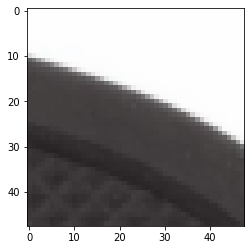

(array([ 153,  161,  193,  495,  751, 1088, 1404, 1724, 1775, 2068, 2206,
       2467, 2572, 2591, 2731, 2859, 3143, 3265, 3772, 3795]),)
(array([ 269,  282,  402,  446,  790,  854, 1149, 1195, 1199, 1302, 1424,
       1552, 1642, 1918, 2060, 2682, 3069, 3240, 3638, 3721]),)


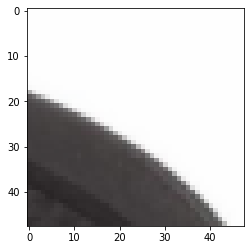

(array([ 161,  193,  300,  495,  751, 1088, 1106, 1419, 1775, 1996, 2078,
       2206, 2418, 2859, 2937, 3143, 3265, 3772, 3795, 4074]),)
(array([ 269,  282,  446,  790,  854, 1149, 1392, 1544, 1552, 1642, 1918,
       2411, 2419, 3069, 3240, 3309, 3638, 3721, 3791, 3902]),)


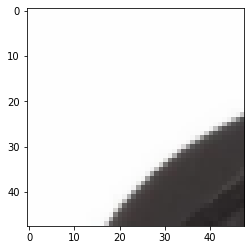

(array([ 116,  161,  193,  300,  680, 1088, 1821, 1996, 2068, 2078, 2169,
       2418, 2707, 2859, 2937, 3076, 3143, 3547, 3731, 4074]),)
(array([ 269,  402,  424,  446,  818,  822, 1199, 1302, 1552, 1715, 1877,
       1918, 2124, 2323, 2633, 2734, 3240, 3509, 3638, 3721]),)


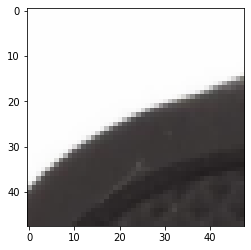

(array([  88,  100,  161,  209,  815, 1088, 1401, 1498, 1602, 1996, 2065,
       2068, 2079, 2329, 2467, 2586, 2745, 2859, 3143, 3265]),)
(array([ 269,  402,  446, 1087, 1191, 1199, 1302, 1539, 1552, 1715, 1918,
       2256, 2419, 2836, 3240, 3309, 3513, 3638, 3721, 3831]),)


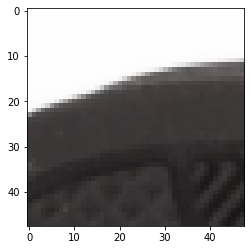

(array([   8,  156,  161,  578,  788,  908,  933,  970,  991, 1088, 1148,
       1602, 1724, 1939, 2594, 2859, 3143, 3497, 3772, 3810]),)
(array([ 269,  384,  446,  768,  854, 1087, 1552, 1715, 1836, 1918, 1982,
       2256, 2419, 3069, 3240, 3486, 3638, 3691, 3721, 3831]),)


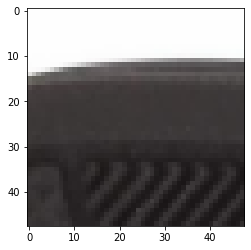

(array([ 415,  579, 1088, 1624, 1724, 1775, 1824, 1841, 1939, 1947, 2418,
       2803, 2859, 2994, 2995, 3069, 3143, 3253, 3731, 4036]),)
(array([ 269,  282,  353,  384,  768,  862,  944, 1199, 1268, 1552, 1918,
       3069, 3240, 3486, 3509, 3638, 3678, 3691, 3721, 3757]),)


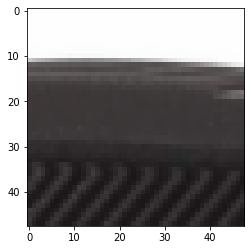

(array([ 161,  309,  470,  815, 1088, 1469, 1724, 1775, 1920, 2068, 2157,
       2418, 2589, 2591, 2673, 2697, 2859, 2995, 3143, 4036]),)
(array([ 269,  282,  384,  790,  828,  862,  944, 1199, 1268, 1918, 2406,
       3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757, 4066]),)


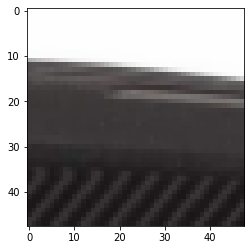

(array([ 161,  470, 1088, 1469, 1775, 1987, 2068, 2157, 2418, 2498, 2589,
       2591, 2859, 2994, 2995, 3143, 3208, 3265, 3547, 4036]),)
(array([ 269,  282,  318,  384,  790,  828,  862, 1087, 1199, 1688, 1918,
       2406, 3069, 3240, 3509, 3638, 3678, 3691, 3757, 4066]),)


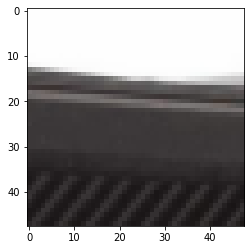

(array([ 309,  470, 1088, 1469, 1724, 1793, 1798, 1987, 2030, 2068, 2470,
       2498, 2589, 2591, 2697, 2859, 2994, 2995, 3143, 3408]),)
(array([ 269,  282,  384,  790,  944, 1149, 1610, 1688, 1918, 2188, 2406,
       2758, 2996, 3069, 3240, 3634, 3638, 3678, 3691, 3757]),)


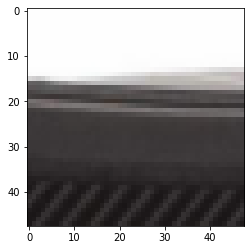

(array([ 430,  815, 1088, 1396, 1420, 1469, 1724, 1775, 1798, 1987, 2030,
       2068, 2470, 2484, 2591, 2697, 2995, 3143, 3408, 4036]),)
(array([ 269,  282,  384,  790,  828,  944,  959, 1199, 1688, 1918, 2406,
       2758, 2996, 3069, 3240, 3634, 3638, 3678, 3691, 3757]),)


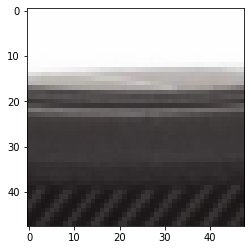

(array([ 815, 1088, 1396, 1472, 1724, 1885, 1987, 2068, 2169, 2498, 2591,
       2673, 2901, 2995, 3143, 3265, 3391, 3547, 3651, 3890]),)
(array([ 269,  318,  384,  790,  828, 1199, 1688, 1918, 2406, 2677, 2758,
       2996, 3069, 3240, 3634, 3638, 3678, 3691, 3721, 3757]),)


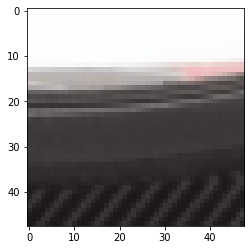

(array([ 528, 1088, 1653, 1724, 1903, 1987, 2068, 2470, 2591, 2670, 2673,
       2697, 2966, 2994, 3143, 3265, 3532, 3547, 3651, 3810]),)
(array([ 269,  318,  790,  862, 1199, 1408, 1688, 1907, 1918, 2188, 2406,
       2677, 2758, 3069, 3240, 3638, 3678, 3691, 3721, 3757]),)


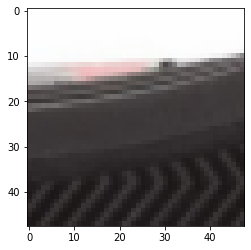

(array([ 185,  528,  529, 1088, 1469, 1835, 1885, 1903, 2068, 2169, 2470,
       2484, 2591, 2673, 2838, 2966, 3143, 3265, 3651, 4036]),)
(array([ 154,  269,  738,  862, 1199, 1268, 1408, 1552, 1907, 2188, 2677,
       3240, 3486, 3638, 3678, 3691, 3721, 3757, 3831, 4064]),)


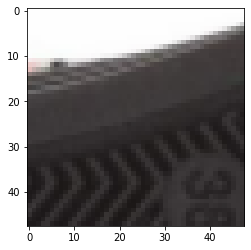

(array([ 185,  680, 1088, 1396, 1724, 1835, 1885, 1903, 1987, 2068, 2470,
       2484, 2673, 2859, 3143, 3265, 3518, 3547, 3602, 3895]),)
(array([ 154,  269,  854,  944, 1149, 1199, 1268, 1473, 1552, 1907, 1982,
       2188, 2406, 2411, 3240, 3560, 3638, 3678, 3721, 3831]),)


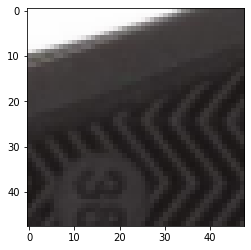

(array([  82,  161,  209,  680,  858, 1088, 1419, 1524, 1724, 1885, 1987,
       2467, 2673, 2859, 3098, 3143, 3547, 3810, 3985, 4012]),)
(array([ 154,  269,  353,  768,  854, 1268, 1424, 1552, 1740, 1907, 1982,
       2179, 2188, 2411, 3240, 3560, 3605, 3638, 3678, 3831]),)


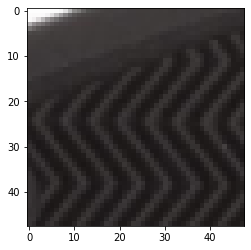

(array([  82,  161,  309,  563,  815, 1088, 1724, 1987, 2467, 2572, 2859,
       2937, 2991, 3076, 3143, 3265, 3495, 3810, 3982, 4012]),)
(array([  85,  154,  269,  353,  768,  828, 1057, 1140, 1183, 1268, 1424,
       1701, 1982, 2188, 2692, 2734, 2807, 3240, 3638, 3831]),)


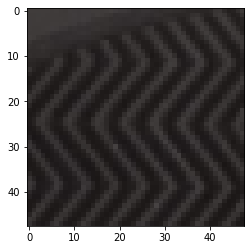

(array([ 153,  161,  200,  815,  933, 1088, 1602, 1689, 1724, 1987, 2467,
       2859, 2937, 2991, 3143, 3265, 3495, 3810, 4003, 4036]),)
(array([  85,  828,  944, 1072, 1183, 1268, 1316, 1472, 1712, 1857, 1982,
       2053, 2091, 2188, 2692, 2734, 2807, 3240, 3638, 3880]),)


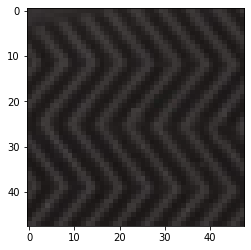

(array([ 153,  161,  341,  815,  866,  908, 1088, 1564, 1602, 1724, 2068,
       2142, 2467, 2859, 3076, 3105, 3143, 3265, 3676, 4003]),)
(array([ 318,  828,  944, 1183, 1316, 1472, 1610, 1712, 1749, 1857, 1982,
       2091, 2188, 2692, 2734, 2807, 3240, 3638, 3678, 3880]),)


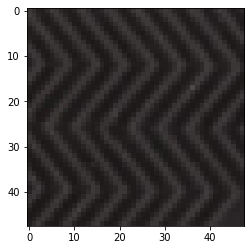

(array([  88,  153,  200,  867, 1088, 1436, 1602, 1724, 1799, 2068, 2142,
       2169, 2380, 2467, 2696, 2917, 3105, 3143, 3982, 4058]),)
(array([ 828,  944, 1183, 1316, 1472, 1610, 1712, 1749, 1857, 1982, 2091,
       2188, 2336, 2692, 2734, 2807, 3240, 3524, 3638, 3880]),)


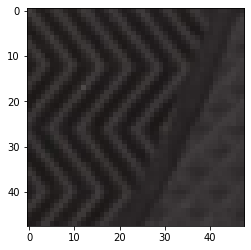

(array([ 153,  200,  867, 1088, 1602, 1724, 1799, 2169, 2279, 2418, 2467,
       2696, 2859, 2917, 3143, 3249, 3647, 3676, 3744, 3982]),)
(array([ 641,  790,  828, 1183, 1316, 1424, 1472, 1610, 1857, 1982, 2082,
       2188, 2692, 2734, 2807, 3240, 3338, 3638, 3678, 3880]),)


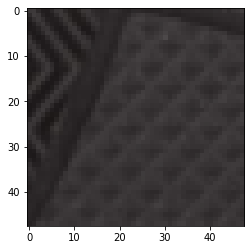

(array([ 153,  200,  867,  908, 1014, 1088, 1436, 1602, 1724, 1799, 2169,
       2467, 2589, 2697, 2859, 3143, 3249, 3647, 3676, 3744]),)
(array([ 269,  565,  790,  944,  959, 1140, 1149, 1642, 1928, 2075, 2188,
       2692, 2807, 3240, 3305, 3338, 3509, 3523, 3638, 3831]),)


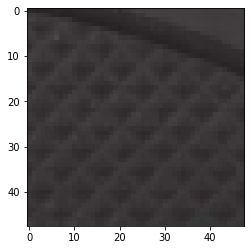

(array([ 153,  161,  200,  867,  933, 1088, 1436, 1602, 1625, 1724, 2138,
       2169, 2279, 2467, 2589, 2697, 2859, 3143, 3249, 3744]),)
(array([ 269,  282,  616,  790, 1149, 1424, 1642, 1917, 2188, 2524, 2807,
       3082, 3240, 3243, 3338, 3509, 3638, 3757, 3831, 3865]),)


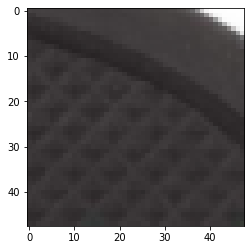

(array([ 153,  161,  200,  815,  867,  947, 1088, 1602, 1724, 1882, 2068,
       2169, 2279, 2467, 2589, 2697, 2859, 2991, 3143, 3744]),)
(array([ 269,  282,  353,  641,  738, 1027, 1087, 1199, 1302, 1424, 1877,
       2060, 2188, 2956, 3240, 3243, 3638, 3721, 3757, 3831]),)


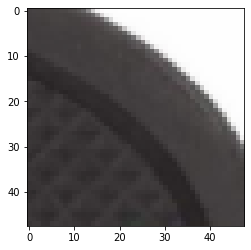

(array([ 153,  161,  200,  815,  867, 1088, 1581, 1602, 1625, 1724, 1882,
       2068, 2138, 2169, 2467, 2697, 2859, 3249, 3744, 3781]),)
(array([ 282,  351,  446,  738, 1191, 1195, 1199, 1302, 1424, 1688, 2060,
       2176, 2419, 2677, 3069, 3240, 3509, 3634, 3638, 3721]),)


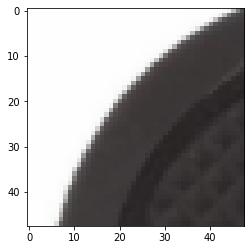

(array([  88,  153,  161,  200,  768,  858,  866, 1088, 1581, 1602, 1724,
       1882, 2169, 2467, 2859, 2937, 2991, 3143, 3518, 3986]),)
(array([ 269,  402,  446,  818,  854, 1149, 1268, 1552, 1918, 1947, 1982,
       2179, 2419, 2758, 3240, 3560, 3638, 3721, 3791, 3831]),)


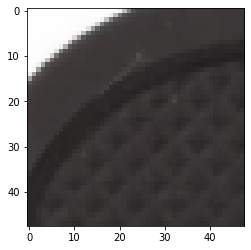

(array([ 108,  116,  200,  680,  855, 1088, 1372, 1436, 1724, 1821, 1873,
       2123, 2467, 2745, 2859, 3143, 3676, 3810, 3858, 3872]),)
(array([  79,  111,  269,  384,  402,  433,  738,  768, 1199, 1268, 1539,
       1552, 1730, 2256, 2677, 3240, 3394, 3638, 3721, 3831]),)


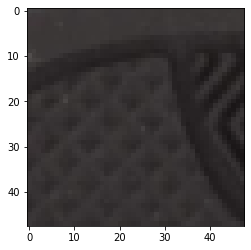

(array([ 161,  815, 1088, 1167, 1394, 1401, 1824, 2068, 2079, 2467, 2745,
       2859, 2937, 3143, 3197, 3265, 3415, 3810, 4028, 4036]),)
(array([ 269,  282,  446,  790,  959, 1027, 1268, 1917, 2188, 2406, 2411,
       2692, 2807, 3240, 3243, 3394, 3503, 3509, 3638, 3831]),)


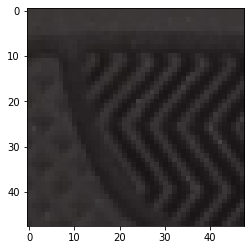

(array([ 153,  161,  815, 1088, 1420, 1824, 1987, 2068, 2191, 2206, 2467,
       2572, 2591, 2859, 2937, 3143, 3265, 3744, 3810, 4036]),)
(array([  85,  154,  828,  862, 1140, 1183, 1268, 1316, 1424, 1982, 2188,
       2692, 2807, 3082, 3240, 3338, 3509, 3638, 3678, 3831]),)


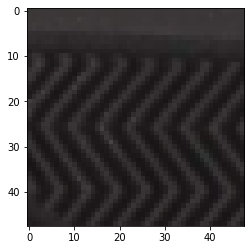

(array([ 153,  742, 1088, 1581, 1602, 1724, 1987, 2068, 2142, 2392, 2467,
       2589, 2859, 2937, 2991, 3076, 3143, 3265, 3391, 3810]),)
(array([ 154,  828, 1183, 1268, 1316, 1424, 1653, 1982, 2053, 2188, 2692,
       2734, 2807, 3082, 3240, 3338, 3509, 3638, 3678, 3880]),)


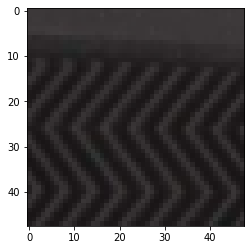

(array([ 153,  768,  815,  866, 1088, 1724, 1775, 1987, 2068, 2169, 2467,
       2589, 2697, 2859, 2991, 3076, 3143, 3265, 3391, 3810]),)
(array([ 828, 1183, 1268, 1316, 1424, 1610, 1917, 1982, 2053, 2188, 2524,
       2692, 2734, 2807, 3082, 3240, 3338, 3509, 3638, 3678]),)


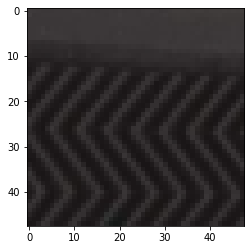

(array([ 153,  161,  680,  866, 1088, 1417, 1724, 1775, 2068, 2279, 2467,
       2697, 2859, 2937, 3076, 3143, 3265, 3391, 3744, 3810]),)
(array([ 641,  828, 1183, 1268, 1316, 1424, 1610, 1917, 1982, 2053, 2188,
       2524, 2692, 2734, 2807, 3082, 3240, 3338, 3509, 3638]),)


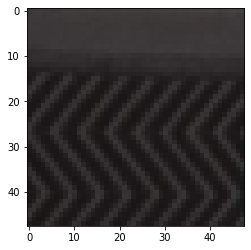

(array([ 161,  300,  680,  815, 1088, 1417, 1724, 1775, 1835, 2418, 2467,
       2859, 2991, 3143, 3391, 3676, 3772, 3810, 4014, 4074]),)
(array([ 828, 1057, 1183, 1268, 1316, 1424, 1544, 1610, 1917, 2053, 2188,
       2524, 2692, 2734, 2807, 3082, 3240, 3338, 3509, 3638]),)


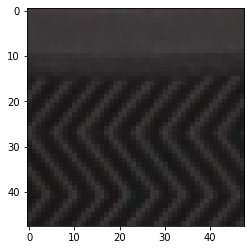

(array([ 815, 1088, 1417, 1724, 1775, 1996, 2279, 2380, 2418, 2467, 2859,
       2991, 3143, 3278, 3391, 3547, 3676, 3772, 3982, 4074]),)
(array([ 828, 1057, 1183, 1268, 1316, 1424, 1610, 1917, 1982, 2053, 2188,
       2524, 2692, 2734, 2807, 3082, 3240, 3338, 3509, 3638]),)


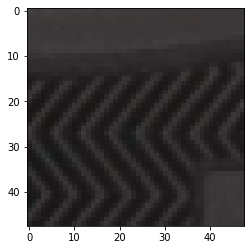

(array([ 751,  815,  953, 1088, 1317, 1724, 1775, 1987, 2068, 2380, 2418,
       2467, 2589, 2697, 2859, 2991, 3143, 3391, 3547, 4074]),)
(array([ 269,  828, 1183, 1268, 1316, 1424, 1982, 2188, 2406, 2519, 2524,
       2692, 2807, 3082, 3240, 3338, 3509, 3638, 3678, 3831]),)


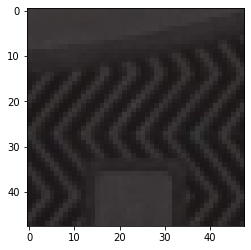

(array([ 815, 1088, 1469, 1693, 1724, 1733, 1987, 2068, 2380, 2467, 2589,
       2859, 2991, 3076, 3143, 3265, 3391, 3547, 3664, 4074]),)
(array([  85,  641,  828, 1183, 1268, 1316, 1424, 2053, 2188, 2692, 2734,
       2807, 3082, 3240, 3338, 3638, 3678, 3680, 3831, 3880]),)


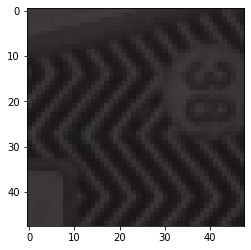

(array([ 161,  815, 1088, 1602, 1689, 1724, 1733, 1987, 2467, 2589, 2591,
       2697, 2859, 2937, 2966, 2991, 3391, 3547, 3810, 4074]),)
(array([ 641,  768,  828, 1057, 1183, 1268, 1316, 1857, 1917, 1982, 2188,
       2524, 2692, 2734, 2807, 3240, 3338, 3638, 3831, 3880]),)


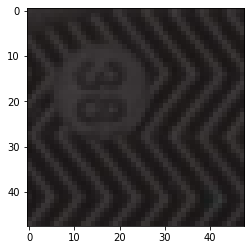

(array([ 153,  161,  815,  858, 1088, 1602, 1653, 1724, 2467, 2591, 2697,
       2859, 2937, 2966, 2991, 3076, 3143, 3265, 3391, 3810]),)
(array([ 790,  828,  944, 1072, 1086, 1183, 1316, 1472, 1610, 1857, 1982,
       2188, 2692, 2734, 2807, 3240, 3509, 3638, 3831, 3880]),)


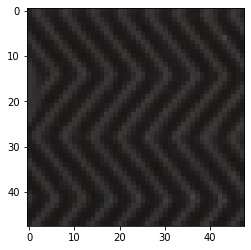

(array([ 153,  200,  751,  815,  866,  933, 1088, 1564, 1602, 1724, 2068,
       2142, 2169, 2467, 2697, 2859, 3143, 3676, 3744, 4003]),)
(array([ 790,  828,  944, 1183, 1316, 1472, 1610, 1749, 1857, 1982, 2091,
       2188, 2336, 2692, 2734, 2807, 3240, 3524, 3638, 3880]),)


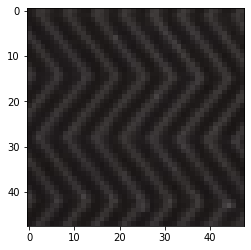

(array([ 153,  200,  867,  933, 1088, 1436, 1602, 1724, 2068, 2169, 2467,
       2574, 2697, 2859, 2917, 3105, 3143, 3676, 3744, 3982]),)
(array([ 828,  862,  944, 1183, 1316, 1472, 1610, 1857, 1982, 2091, 2188,
       2692, 2734, 2807, 3240, 3524, 3638, 3678, 3790, 3880]),)


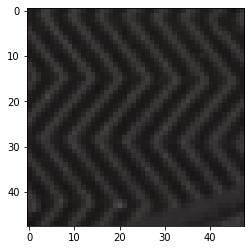

(array([ 153,  200,  933, 1088, 1429, 1436, 1602, 1724, 1799, 2068, 2169,
       2467, 2589, 2696, 2697, 2859, 2917, 3676, 3744, 3982]),)
(array([ 318,  828,  944, 1159, 1183, 1316, 1472, 1610, 1982, 2188, 2692,
       2734, 2807, 3240, 3243, 3524, 3638, 3678, 3790, 3880]),)


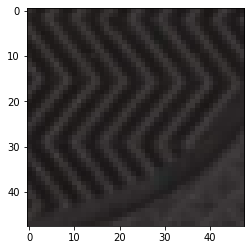

(array([ 153,  200,  742,  815,  933, 1088, 1436, 1602, 1724, 2068, 2169,
       2279, 2467, 2589, 2696, 2697, 2859, 3143, 3676, 3982]),)
(array([ 641,  828,  944, 1159, 1183, 1316, 1472, 1712, 1982, 2188, 2692,
       2734, 2807, 3150, 3240, 3243, 3524, 3638, 3678, 3880]),)


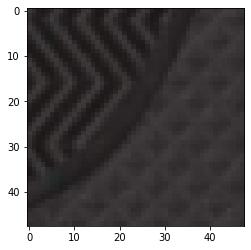

(array([ 153,  161,  200,  633,  933, 1014, 1088, 1436, 1602, 1625, 1724,
       2068, 2279, 2467, 2589, 2697, 2859, 3143, 3676, 3982]),)
(array([ 474,  790,  828, 1140, 1149, 1642, 1917, 1928, 1982, 2188, 2411,
       2692, 2807, 3240, 3305, 3338, 3503, 3523, 3638, 3831]),)


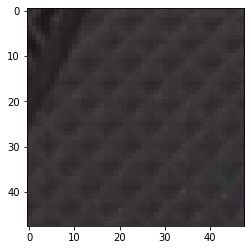

(array([ 153,  200,  576,  815,  866,  914, 1088, 1284, 1436, 1625, 1681,
       2068, 2169, 2328, 2467, 2859, 2917, 3143, 3223, 3744]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1928, 2188, 2586, 2692, 2807,
       3005, 3240, 3305, 3338, 3394, 3509, 3523, 3638, 3831]),)


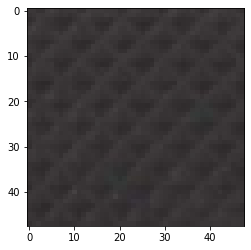

(array([ 153,  742,  947, 1088, 1284, 1436, 1930, 1987, 2068, 2169, 2328,
       2502, 2859, 2917, 3143, 3218, 3223, 3265, 3664, 4058]),)
(array([ 616,  790,  959, 1149, 1642, 1693, 1917, 2188, 2355, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


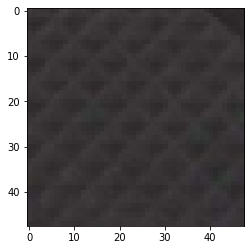

(array([ 153,  742,  751,  867,  914,  947, 1088, 1625, 2068, 2159, 2169,
       2328, 2859, 2917, 3143, 3145, 3218, 3265, 3664, 4058]),)
(array([ 269,  565,  616,  738,  790,  959, 1149, 1642, 1693, 1917, 2188,
       2355, 2807, 3240, 3305, 3338, 3558, 3638, 3721, 3831]),)


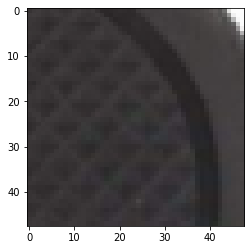

(array([ 161,  751,  866,  933,  947, 1088, 1419, 1436, 1882, 1930, 2068,
       2078, 2169, 2279, 2467, 2859, 2917, 2937, 3143, 3218]),)
(array([ 353,  738,  946, 1087, 1140, 1149, 1191, 1199, 1424, 1635, 1701,
       1877, 2188, 3240, 3558, 3638, 3721, 3831, 4009, 4050]),)


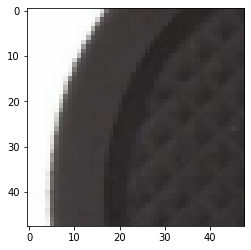

(array([ 153,  161,  766,  866,  867,  933, 1088, 1602, 1724, 1882, 2138,
       2169, 2467, 2589, 2697, 2859, 3143, 3647, 3676, 3744]),)
(array([ 111,  402, 1087, 1268, 1701, 1730, 1918, 1982, 2060, 2086, 2256,
       2419, 2758, 3240, 3394, 3560, 3638, 3721, 3791, 3831]),)


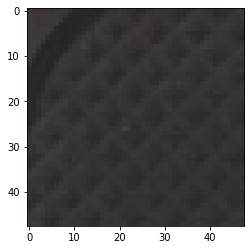

(array([ 153,  161,  742,  866,  933, 1088, 1581, 1602, 1614, 1724, 1882,
       2142, 2169, 2467, 2859, 2991, 3143, 3249, 3676, 3986]),)
(array([ 269,  474,  565,  959, 1140, 1149, 1917, 1928, 2188, 2807, 3240,
       3305, 3338, 3394, 3509, 3523, 3558, 3638, 3721, 3831]),)


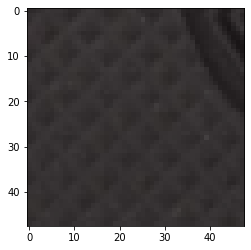

(array([  88,  153,  866,  933,  947, 1088, 1498, 1847, 2068, 2169, 2191,
       2392, 2418, 2467, 2514, 2591, 2859, 3143, 3296, 3810]),)
(array([ 269,  282,  565,  738,  790,  959, 1149, 1917, 2188, 2524, 2807,
       3240, 3305, 3338, 3503, 3509, 3558, 3638, 3741, 3831]),)


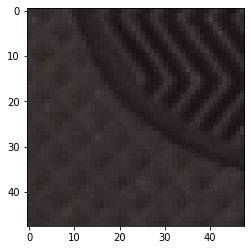

(array([ 153,  633,  788,  866, 1014, 1088, 1625, 1681, 1724, 2068, 2142,
       2169, 2467, 2859, 2917, 2991, 3076, 3143, 3781, 3872]),)
(array([ 269,  282,  790,  828,  944,  959, 1268, 1424, 1688, 1982, 2188,
       2807, 3240, 3243, 3503, 3509, 3560, 3638, 3678, 3831]),)


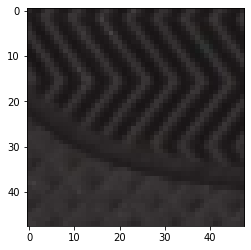

(array([ 153,  633,  635,  866,  933, 1014, 1088, 1882, 2068, 2169, 2279,
       2467, 2589, 2859, 2917, 2991, 3143, 3223, 3351, 3744]),)
(array([ 269,  790,  828,  862, 1159, 1183, 1268, 1316, 1982, 2082, 2188,
       2692, 2734, 2807, 3240, 3243, 3338, 3638, 3678, 3831]),)


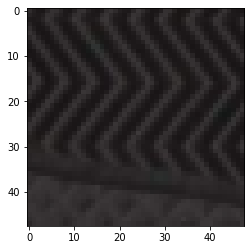

(array([ 153,  200,  633,  788,  849,  866,  867,  933, 1014, 1088, 1724,
       2068, 2142, 2279, 2467, 2745, 2859, 2917, 3143, 3781]),)
(array([ 318,  790,  828,  862, 1159, 1183, 1316, 1472, 1982, 2188, 2406,
       2692, 2807, 3082, 3240, 3338, 3638, 3678, 3790, 3880]),)


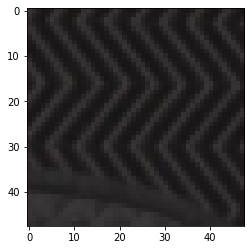

(array([ 153,  200,  633,  788,  866,  867,  933, 1088, 1602, 1681, 1724,
       2068, 2142, 2169, 2467, 2859, 3076, 3143, 3670, 3744]),)
(array([ 154,  828,  862, 1183, 1316, 1472, 1610, 1749, 1982, 2188, 2692,
       2807, 3240, 3243, 3338, 3524, 3638, 3678, 3790, 3880]),)


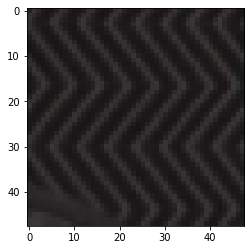

(array([ 153,  742,  815,  866,  867, 1088, 1602, 1681, 1724, 2068, 2142,
       2169, 2467, 2589, 2697, 2859, 2917, 2991, 3143, 3676]),)
(array([ 828,  862,  944, 1183, 1316, 1472, 1610, 1982, 2188, 2336, 2692,
       2734, 2807, 3240, 3243, 3338, 3524, 3638, 3790, 3880]),)


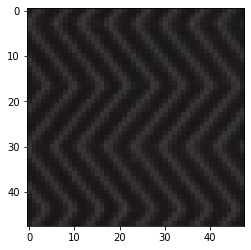

(array([ 153,  161,  742,  815,  867, 1088, 1436, 1602, 1681, 1724, 2279,
       2589, 2697, 2991, 3076, 3143, 3249, 3340, 3398, 3564]),)
(array([ 828,  944, 1183, 1316, 1472, 1982, 2091, 2188, 2692, 2734, 2807,
       3240, 3243, 3338, 3509, 3524, 3638, 3678, 3790, 3880]),)


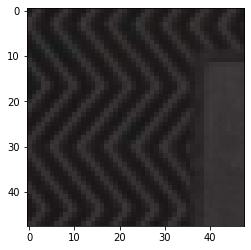

(array([ 153,  742,  755,  815,  953, 1088, 1461, 2418, 2574, 2608, 2697,
       2745, 2991, 3208, 3327, 3664, 3744, 3781, 3877, 3896]),)
(array([ 641,  790,  828,  944, 1183, 1316, 1472, 1982, 2188, 2692, 2807,
       3150, 3240, 3243, 3338, 3524, 3638, 3678, 3790, 3880]),)


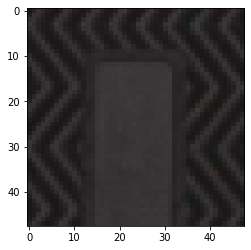

(array([ 341,  484,  528,  742,  815, 1088, 1308, 1724, 2142, 2279, 2521,
       2589, 2697, 2917, 2990, 2991, 3208, 3664, 3773, 3781]),)
(array([ 331,  353,  790,  862, 1140, 1159, 1316, 1472, 2144, 2188, 2692,
       2807, 3240, 3243, 3509, 3523, 3638, 3678, 3831, 3880]),)


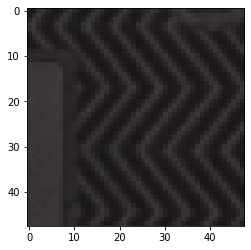

(array([ 474,  815, 1088, 1108, 1308, 1724, 1749, 2169, 2279, 2418, 2521,
       2543, 2589, 2591, 2697, 2917, 3208, 3664, 3773, 4014]),)
(array([ 154,  828,  862, 1183, 1316, 1472, 1610, 1982, 2091, 2188, 2336,
       2406, 2692, 2734, 2807, 3240, 3509, 3638, 3680, 3880]),)


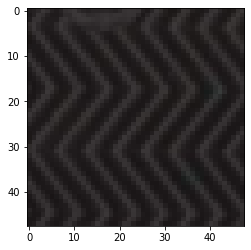

(array([  88,  153,  161,  233,  866,  867, 1088, 1308, 1602, 1603, 1724,
       2169, 2418, 2589, 2591, 2697, 2991, 3076, 3249, 3744]),)
(array([ 828,  862,  944, 1183, 1316, 1472, 1749, 1982, 2091, 2188, 2692,
       2734, 2807, 3240, 3243, 3338, 3524, 3638, 3790, 3880]),)


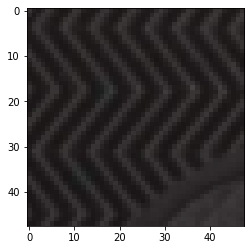

(array([ 153,  200, 1088, 1602, 1724, 1882, 2068, 2169, 2418, 2467, 2697,
       2859, 2917, 3143, 3194, 3249, 3647, 3676, 3744, 3982]),)
(array([ 828,  862, 1183, 1316, 1472, 1982, 2091, 2188, 2411, 2692, 2734,
       2807, 3240, 3243, 3338, 3524, 3638, 3678, 3680, 3880]),)


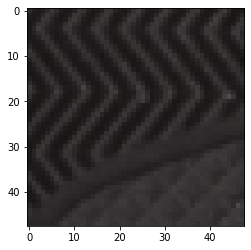

(array([ 153,  200,  742,  815,  933, 1088, 1436, 1602, 1724, 2142, 2169,
       2467, 2589, 2696, 2697, 2859, 2917, 3676, 3744, 3982]),)
(array([ 790,  828,  862, 1159, 1183, 1472, 1982, 2188, 2406, 2692, 2734,
       2807, 3150, 3240, 3243, 3338, 3638, 3678, 3680, 3831]),)


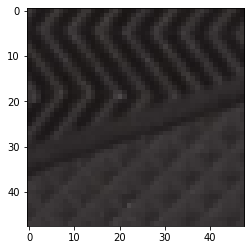

(array([ 153,  200,  633,  815, 1088, 1602, 1724, 2068, 2142, 2169, 2279,
       2467, 2589, 2697, 2859, 2917, 3076, 3143, 3676, 3982]),)
(array([ 269,  790,  828,  944, 1316, 1917, 1982, 2188, 2406, 2411, 2692,
       2807, 3240, 3243, 3338, 3509, 3523, 3638, 3678, 3831]),)


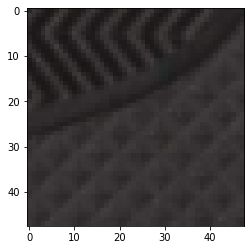

(array([ 153,  161,  200,  742,  933, 1088, 1436, 1602, 1724, 2068, 2169,
       2279, 2467, 2589, 2697, 2859, 2917, 3076, 3143, 3676]),)
(array([ 269,  790, 1140, 1642, 1917, 1928, 1982, 2188, 2411, 2692, 2807,
       3005, 3240, 3243, 3338, 3509, 3523, 3638, 3678, 3831]),)


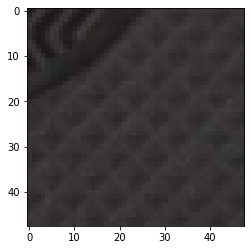

(array([ 153,  161,  200,  742,  866,  933, 1088, 1308, 1681, 2068, 2169,
       2279, 2328, 2467, 2575, 2859, 2917, 2991, 3143, 3165]),)
(array([ 269,  565,  616,  790,  959, 1140, 1149, 1642, 1928, 2188, 2411,
       2692, 2807, 3005, 3240, 3338, 3523, 3638, 3831, 3865]),)


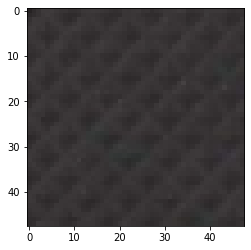

(array([ 474,  742,  849,  866,  867,  914,  947, 1088, 1754, 1804, 2169,
       2279, 2467, 2502, 2859, 2917, 2991, 3143, 3578, 3781]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


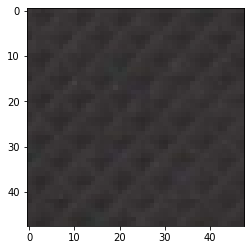

(array([ 474,  742,  768,  849,  866,  947, 1088, 2068, 2169, 2279, 2502,
       2521, 2859, 2917, 2991, 3143, 3265, 3664, 3781, 3810]),)
(array([ 616,  790,  959, 1149, 1642, 1693, 1917, 2188, 2692, 2807, 3240,
       3305, 3338, 3394, 3509, 3523, 3638, 3721, 3741, 3831]),)


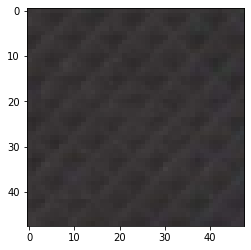

(array([ 474,  742,  849,  866,  947, 1088, 1242, 2068, 2169, 2279, 2502,
       2521, 2859, 2917, 2991, 3143, 3265, 3664, 3781, 3810]),)
(array([ 474,  565,  616,  790,  959, 1149, 1693, 1917, 1928, 2188, 2807,
       3240, 3305, 3338, 3394, 3509, 3523, 3638, 3721, 3831]),)


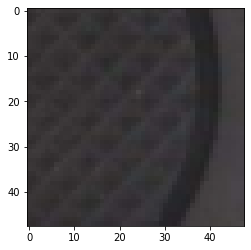

(array([ 108,  474,  751,  849,  866,  867,  947, 1018, 1088, 1804, 2068,
       2169, 2859, 2917, 2991, 3143, 3265, 3664, 3781, 3810]),)
(array([ 474,  738,  765,  790, 1140, 1149, 1199, 1424, 1917, 2188, 2569,
       3240, 3243, 3503, 3509, 3558, 3601, 3638, 3721, 3831]),)


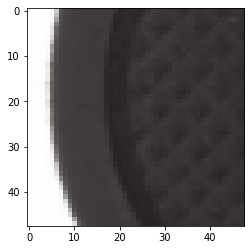

(array([ 153,  161,  200,  742,  866,  867,  947, 1088, 1602, 1724, 2068,
       2169, 2467, 2589, 2859, 2917, 2991, 3143, 3630, 3761]),)
(array([ 111,  353,  551,  879, 1087, 1701, 1730, 1918, 2086, 2256, 2758,
       3240, 3305, 3394, 3558, 3560, 3638, 3721, 3831, 4009]),)


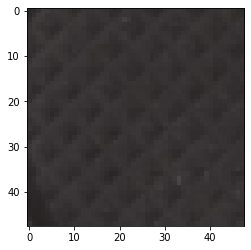

(array([ 153,  161,  866,  933, 1088, 1581, 1602, 1724, 2142, 2169, 2467,
       2589, 2697, 2859, 2991, 3030, 3143, 3249, 3676, 3986]),)
(array([ 565,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2692, 2807,
       3240, 3305, 3338, 3394, 3509, 3523, 3638, 3741, 3831]),)


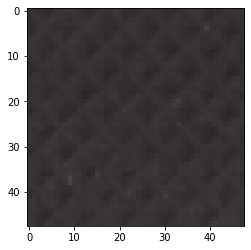

(array([ 153,  866, 1088, 1749, 2068, 2169, 2392, 2418, 2467, 2519, 2591,
       2697, 2859, 2991, 3076, 3143, 3485, 3744, 3781, 3786]),)
(array([ 474,  565,  790,  959, 1149, 1642, 1790, 1917, 2188, 2692, 2807,
       3240, 3305, 3338, 3394, 3509, 3638, 3721, 3741, 3831]),)


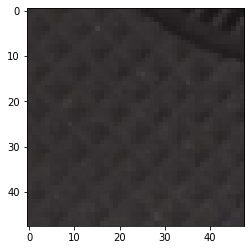

(array([ 153,  200,  742,  788,  815,  908, 1014, 1088, 1602, 1724, 2068,
       2169, 2418, 2467, 2697, 2859, 2917, 3105, 3143, 3744]),)
(array([ 269,  569,  959, 1149, 1199, 1424, 1917, 2188, 2524, 2586, 2807,
       3240, 3243, 3305, 3338, 3509, 3558, 3638, 3741, 3831]),)


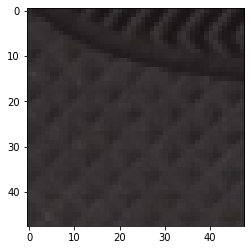

(array([ 153,  161,  200,  742,  866, 1088, 1681, 1724, 2068, 2142, 2169,
       2328, 2467, 2859, 2917, 2991, 3143, 3265, 3578, 3810]),)
(array([ 269,  790,  959, 1140, 1149, 1642, 1917, 1928, 2188, 2411, 2524,
       2807, 3005, 3240, 3243, 3509, 3523, 3638, 3831, 3865]),)


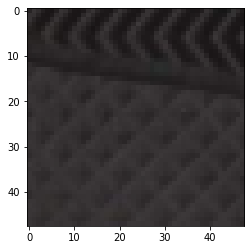

(array([ 153,  200,  742,  788,  866,  947, 1088, 1105, 1724, 2068, 2142,
       2169, 2467, 2489, 2859, 2991, 3143, 3265, 3781, 3810]),)
(array([ 269,  561,  790,  959, 1642, 1917, 2188, 2406, 2411, 2524, 2807,
       3005, 3240, 3243, 3503, 3509, 3523, 3638, 3678, 3831]),)


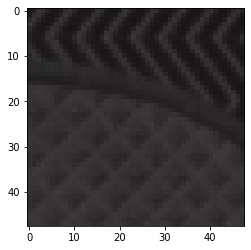

(array([ 153,  200,  633,  866,  867, 1014, 1088, 1419, 1602, 1724, 1882,
       2068, 2138, 2169, 2467, 2859, 2991, 3143, 3744, 3781]),)
(array([ 269,  790,  828,  959, 1140, 1642, 1917, 1982, 2188, 2406, 2411,
       2692, 2807, 3240, 3243, 3338, 3523, 3638, 3678, 3831]),)


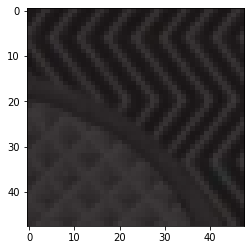

(array([ 153,  161,  742,  867, 1088, 1602, 1681, 1724, 1882, 2068, 2138,
       2169, 2467, 2697, 2859, 3105, 3143, 3647, 3676, 3744]),)
(array([ 269,  790,  828,  862, 1140, 1183, 1316, 1982, 2188, 2406, 2411,
       2692, 2734, 2807, 3240, 3243, 3338, 3509, 3638, 3831]),)


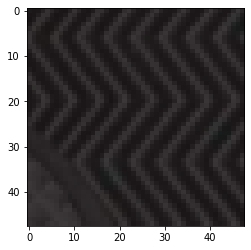

(array([ 153,  430, 1071, 1088, 1317, 1602, 1681, 2068, 2138, 2697, 2698,
       2780, 2859, 2914, 3143, 3221, 3340, 3398, 3670, 4058]),)
(array([ 828,  944, 1183, 1316, 1472, 1982, 2091, 2188, 2336, 2406, 2411,
       2692, 2734, 2807, 3240, 3243, 3338, 3638, 3678, 3880]),)


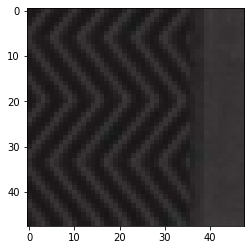

(array([ 475,  629,  664,  672,  798,  867, 1088, 1317, 1634, 1810, 1919,
       2200, 2308, 2616, 2942, 3143, 3327, 3586, 3664, 3877]),)
(array([ 641,  652,  828,  944, 1183, 1316, 1472, 1610, 1982, 2188, 2692,
       2807, 3150, 3240, 3243, 3338, 3509, 3638, 3678, 3880]),)


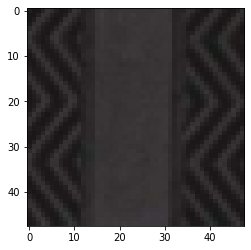

(array([ 103,  536,  672,  755,  919,  953, 1088, 1317, 1729, 1857, 1903,
       1929, 2373, 2942, 3072, 3143, 3265, 3408, 3664, 4036]),)
(array([ 269,  353,  790, 1140, 1316, 1982, 2144, 2188, 2406, 2411, 2692,
       2807, 3240, 3243, 3394, 3509, 3523, 3638, 3678, 3831]),)


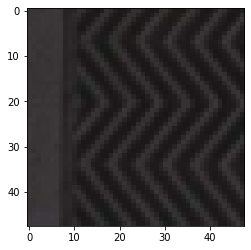

(array([  45,   63,  103,  284,  467,  919, 1038, 1088, 1108, 1634, 1835,
       2292, 2521, 2850, 2859, 3072, 3265, 3408, 3630, 3664]),)
(array([  85,  652,  828,  862, 1183, 1316, 1472, 1982, 2188, 2406, 2411,
       2519, 2692, 2734, 2807, 3240, 3509, 3638, 3678, 3880]),)


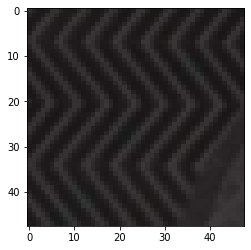

(array([  33,  153,  273,  633,  751,  866,  867, 1088, 1414, 1419, 1446,
       1559, 2127, 2169, 2569, 2850, 3105, 3578, 3773, 3781]),)
(array([  85,  828,  862, 1183, 1316, 1472, 1982, 2091, 2188, 2336, 2411,
       2692, 2734, 2807, 3240, 3338, 3524, 3638, 3680, 3880]),)


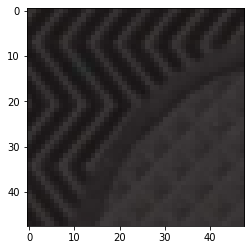

(array([ 153,  161,  200,  742,  815,  933, 1088, 1602, 1724, 1882, 2142,
       2169, 2418, 2467, 2589, 2697, 2991, 3249, 3676, 3891]),)
(array([ 790,  828, 1183, 1472, 1982, 2053, 2188, 2202, 2406, 2411, 2692,
       2734, 2807, 3150, 3240, 3338, 3638, 3678, 3831, 3880]),)


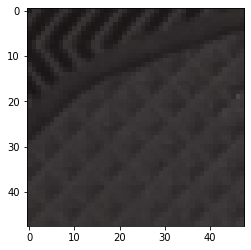

(array([ 153,  200,  815,  933, 1088, 1436, 1602, 1724, 1882, 2068, 2138,
       2279, 2467, 2589, 2696, 2697, 2859, 2991, 3676, 3982]),)
(array([ 269,  551,  790, 1140, 1149, 1642, 1928, 1982, 2188, 2202, 2411,
       2807, 3005, 3240, 3338, 3394, 3503, 3523, 3638, 3831]),)


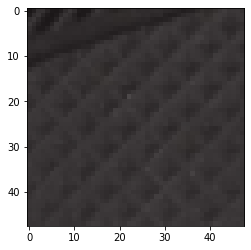

(array([ 153,  156,  200,  576,  933, 1014, 1088, 1724, 1882, 2068, 2138,
       2169, 2279, 2467, 2574, 2697, 2859, 2917, 3076, 3143]),)
(array([ 269,  616,  790,  959, 1140, 1149, 1740, 1917, 1928, 2188, 2411,
       2807, 3005, 3240, 3338, 3509, 3523, 3558, 3638, 3831]),)


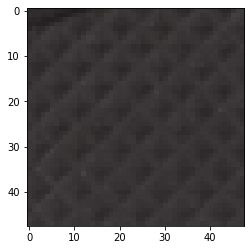

(array([ 153,  200,  768,  914,  947, 1037, 1088, 1681, 1882, 2068, 2169,
       2328, 2467, 2589, 2696, 2859, 2991, 3143, 3223, 3781]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1740, 1917, 1928, 2188, 2355,
       2692, 2807, 3240, 3338, 3509, 3523, 3558, 3638, 3831]),)


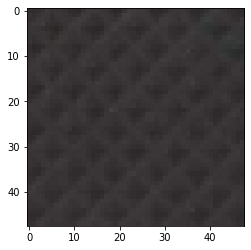

(array([ 153,  161,  742,  866,  947, 1088, 1681, 1882, 2169, 2279, 2502,
       2675, 2859, 2917, 2991, 3143, 3165, 3265, 3781, 3810]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1917, 2188, 2355, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


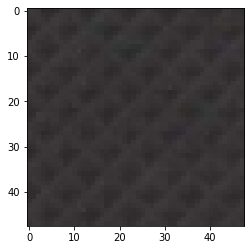

(array([ 161,  233,  474,  742,  866,  947, 1088, 1105, 2039, 2068, 2169,
       2589, 2859, 2991, 3143, 3265, 3664, 3781, 3810, 3980]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1693, 1917, 1928, 2188, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


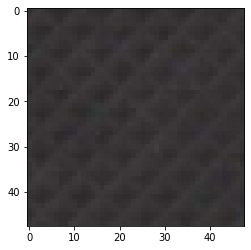

(array([ 153,  768,  849,  866,  947, 1088, 1105, 1739, 2068, 2169, 2279,
       2589, 2675, 2859, 2991, 3143, 3223, 3265, 3664, 3810]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1693, 1917, 1928, 2188, 2807,
       3240, 3305, 3338, 3509, 3523, 3638, 3721, 3741, 3831]),)


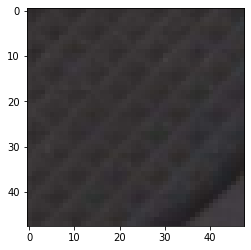

(array([ 108,  153,  200,  742,  768,  866,  867,  933,  947, 1088, 2169,
       2279, 2467, 2589, 2859, 2917, 2991, 3143, 3223, 3265]),)
(array([ 269,  565,  616,  738,  959, 1149, 1199, 1424, 1917, 2188, 2355,
       3240, 3305, 3338, 3503, 3509, 3638, 3721, 3741, 3831]),)


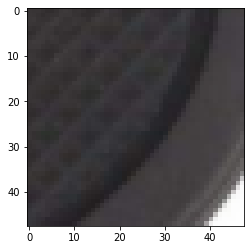

(array([ 153,  742,  751,  849,  866,  867,  947, 1088, 2068, 2169, 2279,
       2467, 2589, 2859, 2917, 2991, 3143, 3664, 3781, 3810]),)
(array([ 269,  282,  353,  446,  738,  946, 1027, 1087, 1140, 1149, 1199,
       1424, 1635, 1688, 1877, 2176, 3240, 3638, 3721, 3831]),)


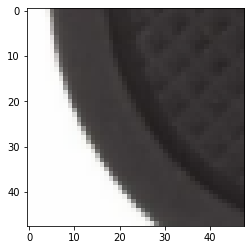

(array([ 153,  161,  742,  866,  867,  933, 1088, 1602, 1724, 1882, 2068,
       2169, 2279, 2467, 2589, 2859, 3143, 3744, 3810, 3986]),)
(array([ 351,  446,  879, 1087, 1268, 1552, 1688, 1836, 1918, 1947, 1982,
       2179, 2375, 2419, 3240, 3560, 3638, 3721, 3791, 3831]),)


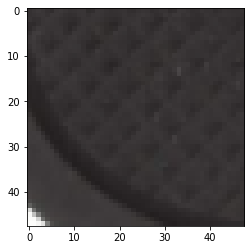

(array([ 153,  156,  161,  258,  680,  866,  933, 1088, 1414, 1602, 1724,
       1750, 2467, 2484, 2859, 3143, 3477, 3772, 3810, 4003]),)
(array([  20,   79,  269,  329,  353,  384,  474,  551,  565,  959, 1140,
       1552, 1730, 2544, 3030, 3240, 3394, 3558, 3638, 3831]),)


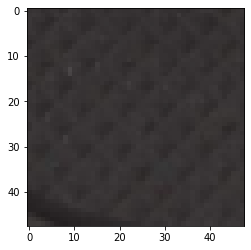

(array([ 153,  156,  699,  788,  815,  919,  951, 1088, 1223, 1602, 1724,
       2068, 2142, 2418, 3015, 3197, 3772, 3803, 4028, 4036]),)
(array([ 269,  474,  565,  790,  959, 1149, 1642, 1917, 2188, 2692, 2807,
       3240, 3305, 3338, 3394, 3509, 3558, 3638, 3721, 3831]),)


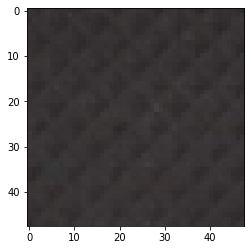

(array([ 153,  815,  866, 1088, 1602, 1724, 2068, 2169, 2392, 2418, 2467,
       2591, 2697, 2859, 3105, 3143, 3676, 3744, 4003, 4014]),)
(array([ 269,  474,  790,  959, 1149, 1642, 1790, 1917, 2188, 2692, 2807,
       3240, 3305, 3338, 3394, 3509, 3523, 3638, 3721, 3831]),)


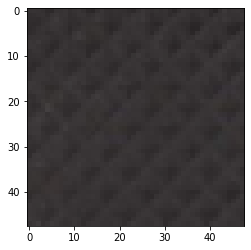

(array([ 153,  200,  528,  867,  914, 1088, 1308, 1602, 1724, 2068, 2169,
       2418, 2467, 2697, 2859, 2914, 2917, 3105, 3143, 3810]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


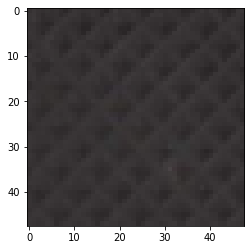

(array([ 153,  200,  742,  867,  908, 1088, 1602, 1724, 1882, 2138, 2169,
       2279, 2467, 2697, 2859, 2917, 3143, 3744, 3810, 4058]),)
(array([ 269,  474,  616,  790,  959, 1149, 1642, 1917, 2188, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


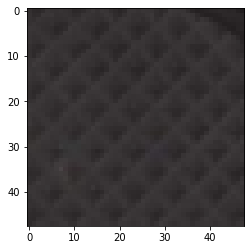

(array([ 153,  161,  200,  430,  866,  867, 1088, 1602, 1724, 1882, 2138,
       2169, 2279, 2418, 2467, 2697, 2859, 3676, 3744, 3982]),)
(array([ 269,  474,  565,  616,  790,  959, 1149, 1693, 1917, 2188, 2355,
       2586, 2807, 3240, 3305, 3338, 3509, 3558, 3638, 3831]),)


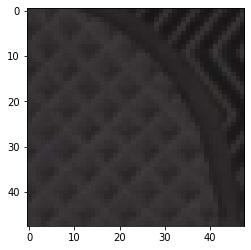

(array([ 153,  161,  867, 1088, 1602, 1724, 1799, 1882, 2138, 2142, 2169,
       2418, 2467, 2696, 2697, 2917, 3076, 3647, 3676, 3744]),)
(array([ 269,  282,  351,  790, 1140, 1149, 1917, 2188, 2406, 2411, 2524,
       2807, 3005, 3240, 3243, 3338, 3503, 3509, 3638, 3831]),)


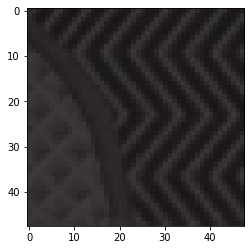

(array([ 153,  161,  200,  528,  742,  867, 1088, 1602, 1681, 1724, 1882,
       2138, 2418, 2589, 2697, 2859, 2991, 3647, 3744, 4058]),)
(array([ 652,  828,  862, 1183, 1316, 1982, 2053, 2188, 2406, 2411, 2692,
       2807, 3240, 3243, 3509, 3638, 3678, 3680, 3831, 3880]),)


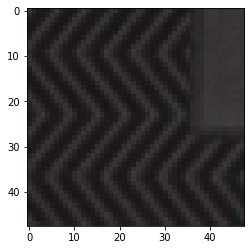

(array([ 103,  153,  161,  205,  953, 1088, 1681, 1724, 2169, 2279, 2418,
       2467, 2574, 2589, 2697, 2745, 2859, 3030, 3143, 3744]),)
(array([ 641,  652,  828, 1183, 1316, 1472, 1653, 1982, 2053, 2188, 2406,
       2411, 2692, 2734, 2807, 3240, 3338, 3638, 3678, 3880]),)


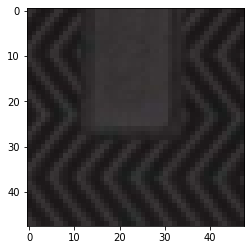

(array([ 161,  755,  867,  914, 1088, 1414, 1724, 2068, 2169, 2279, 2418,
       2467, 2521, 2589, 2697, 2859, 3143, 3249, 3810, 4014]),)
(array([ 790,  828,  862, 1316, 1982, 2082, 2188, 2336, 2406, 2411, 2692,
       2734, 2807, 3240, 3243, 3509, 3638, 3678, 3831, 3880]),)


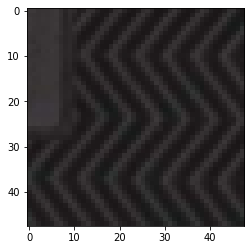

(array([ 867,  914, 1088, 1106, 2068, 2169, 2279, 2284, 2418, 2467, 2521,
       2589, 2664, 2697, 2859, 2939, 2966, 3143, 3512, 4014]),)
(array([ 652,  828, 1183, 1316, 1472, 1982, 2053, 2188, 2406, 2411, 2692,
       2734, 2807, 3240, 3243, 3509, 3638, 3678, 3680, 3880]),)


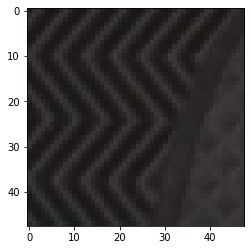

(array([  33,  153,  400,  514,  867,  868, 1088, 1414, 1724, 2169, 2279,
       2589, 2591, 2794, 3105, 3249, 3391, 3647, 4014, 4036]),)
(array([ 641,  828,  862, 1159, 1183, 1316, 1472, 1982, 2053, 2188, 2411,
       2692, 2734, 2807, 3150, 3240, 3338, 3638, 3678, 3880]),)


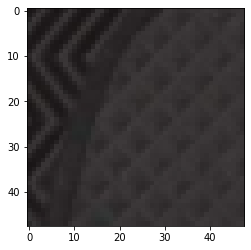

(array([ 153,  161,  742,  933, 1088, 1436, 1602, 1724, 1882, 2169, 2279,
       2467, 2589, 2697, 2859, 2991, 3143, 3249, 3676, 3982]),)
(array([ 269,  551,  565,  790, 1140, 1149, 1642, 1928, 2075, 2188, 2411,
       2692, 2734, 2807, 3240, 3338, 3394, 3523, 3638, 3831]),)


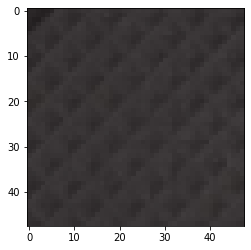

(array([ 153,  161,  200,  474,  933, 1088, 1724, 1882, 2169, 2279, 2467,
       2575, 2696, 2859, 2917, 2991, 3076, 3143, 3896, 3982]),)
(array([ 269,  474,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3558, 3638, 3831]),)


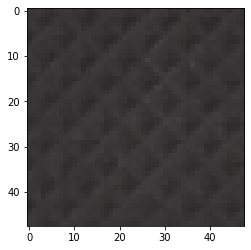

(array([ 153,  161,  742,  866,  947, 1088, 1681, 1724, 1882, 2169, 2467,
       2859, 2917, 2974, 2991, 3076, 3143, 3578, 3781, 3999]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2586, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


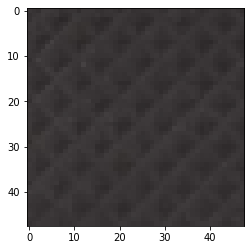

(array([ 153,  633,  768,  788,  866,  947, 1088, 1105, 2068, 2078, 2169,
       2249, 2328, 2467, 2859, 2991, 3143, 3218, 3265, 3781]),)
(array([ 269,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2692, 2807,
       3005, 3240, 3305, 3338, 3394, 3509, 3638, 3721, 3831]),)


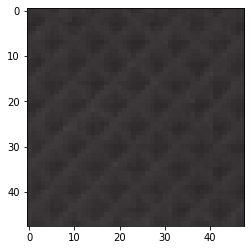

(array([ 153,  474,  633,  635,  742,  768,  866,  933,  947, 1088, 1284,
       2068, 2169, 2279, 2467, 2859, 2917, 2991, 3143, 3351]),)
(array([ 474,  616,  790,  959, 1149, 1642, 1790, 1917, 1928, 2188, 2692,
       2807, 3240, 3305, 3338, 3509, 3523, 3638, 3721, 3831]),)


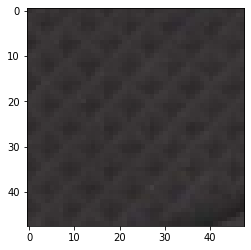

(array([ 200,  768,  866,  947, 1088, 1882, 1987, 2008, 2068, 2169, 2279,
       2328, 2467, 2859, 2917, 3143, 3218, 3223, 3744, 3896]),)
(array([ 269,  565,  616,  790,  959, 1149, 1642, 1917, 2188, 2586, 2807,
       3240, 3305, 3338, 3394, 3509, 3558, 3638, 3721, 3831]),)


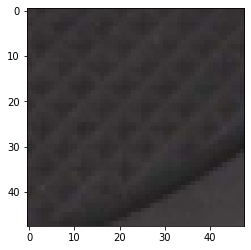

(array([ 153,  200,  768,  866,  867,  947, 1088, 2068, 2169, 2279, 2328,
       2467, 2675, 2735, 2859, 2991, 3143, 3223, 3265, 3810]),)
(array([ 269,  282,  565, 1199, 1424, 1917, 2176, 2188, 2586, 2807, 3240,
       3243, 3338, 3503, 3509, 3638, 3721, 3741, 3757, 3831]),)


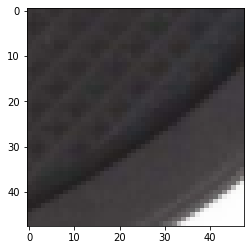

(array([ 153,  161,  768,  866,  933,  947, 1088, 1724, 2068, 2169, 2467,
       2521, 2859, 3143, 3223, 3265, 3578, 3744, 3810, 4058]),)
(array([ 269,  282,  738, 1027, 1087, 1191, 1199, 1424, 1552, 1688, 1877,
       2060, 2176, 3069, 3240, 3634, 3638, 3678, 3721, 3831]),)


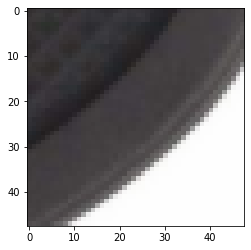

(array([ 153,  161,  633,  751,  768,  866,  933,  974, 1088, 1724, 2467,
       2589, 2680, 2859, 3143, 3265, 3744, 3781, 3810, 4003]),)
(array([ 269,  282,  351,  446,  790, 1027, 1149, 1199, 1202, 1552, 1688,
       2060, 2176, 2419, 2758, 3069, 3240, 3634, 3638, 3721]),)


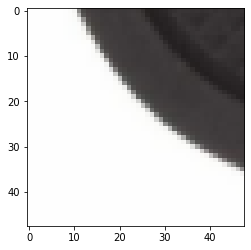

(array([ 153,  161,  390,  680,  974, 1088, 1429, 1689, 1724, 2418, 2467,
       2484, 2859, 2937, 3143, 3218, 3518, 3772, 3810, 3872]),)
(array([  66,  269,  282,  402,  424,  446,  818, 1199, 1302, 1424, 1552,
       1688, 1779, 1918, 2179, 3240, 3638, 3721, 3831, 4003]),)


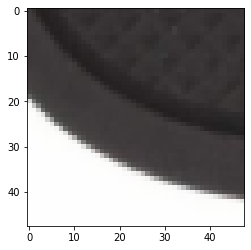

(array([ 161,  430,  910,  919, 1010, 1088, 1310, 1419, 1724, 1987, 2044,
       2707, 2745, 2865, 2984, 3069, 3218, 3265, 3772, 3985]),)
(array([ 269,  297,  384,  402,  446, 1268, 1552, 1688, 1918, 1947, 1982,
       2256, 3069, 3240, 3276, 3309, 3394, 3638, 3721, 3831]),)


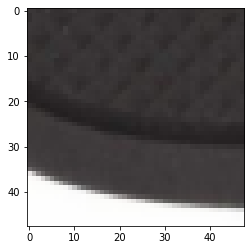

(array([ 530,  578,  788,  866,  919, 1088, 1415, 1419, 1724, 1775, 1821,
       1824, 1996, 2418, 2794, 2797, 2859, 3143, 3772, 3810]),)
(array([  79,  269,  282,  384,  446, 1268, 1539, 1544, 1552, 1730, 2256,
       2544, 3069, 3240, 3560, 3638, 3691, 3721, 3757, 3831]),)


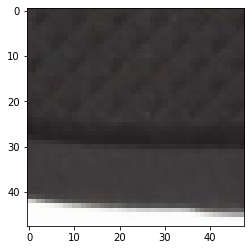

(array([ 116,  815,  951, 1010, 1088, 1223, 1419, 1632, 1724, 1824, 1841,
       1996, 2418, 2803, 2995, 3069, 3104, 3143, 3772, 4036]),)
(array([ 269,  282,  384,  790,  944,  959, 1149, 1199, 1552, 1701, 2188,
       2499, 3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757]),)


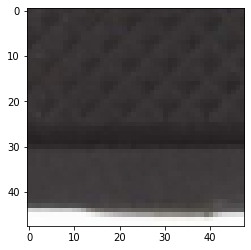

(array([ 161,  309,  579,  815, 1010, 1088, 1223, 1419, 1420, 1602, 1987,
       2418, 2498, 2591, 2806, 2859, 3143, 3547, 3772, 4036]),)
(array([ 269,  282,  384,  616,  790,  944,  959, 1149, 1199, 1268, 1552,
       2188, 3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757]),)


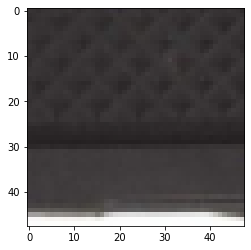

(array([ 161,  528,  815, 1088, 1419, 1420, 1469, 1624, 1724, 1987, 2068,
       2169, 2498, 2591, 2859, 3143, 3391, 3408, 3547, 4036]),)
(array([ 269,  282,  384,  790,  944,  959, 1199, 1552, 2188, 2406, 2524,
       3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757, 3865]),)


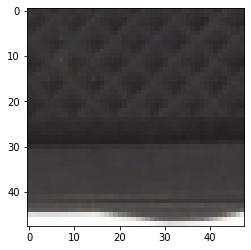

(array([ 161,  815, 1088, 1420, 1724, 1987, 2068, 2169, 2498, 2589, 2591,
       2697, 2859, 2914, 3143, 3208, 3391, 3578, 3664, 4036]),)
(array([ 269,  282,  384,  616,  738,  790,  959, 1199, 1408, 1701, 2188,
       2524, 3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757]),)


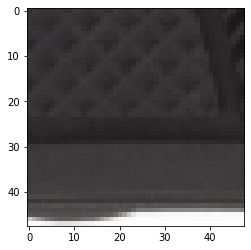

(array([ 161,  919, 1088, 1417, 1420, 1624, 1724, 1996, 2068, 2169, 2589,
       2591, 2697, 2859, 3143, 3223, 3371, 3664, 3772, 4036]),)
(array([ 269,  282,  318,  384,  616,  790,  944,  959, 1027, 1149, 2406,
       3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757, 3865]),)


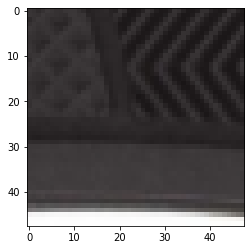

(array([  88,  161,  528,  815, 1088, 1624, 1724, 2030, 2068, 2169, 2589,
       2591, 2697, 2859, 3143, 3371, 3408, 3772, 3881, 4036]),)
(array([ 269,  318,  790,  828,  944,  959, 1199, 1408, 1701, 1907, 2188,
       2406, 2524, 2758, 3069, 3240, 3509, 3638, 3678, 3721]),)


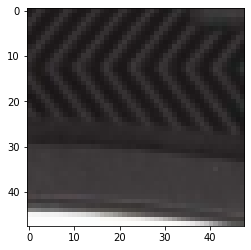

(array([ 161,  815, 1088, 1420, 1602, 1724, 1987, 2068, 2169, 2467, 2589,
       2591, 2697, 2859, 3143, 3265, 3547, 3881, 4036, 4058]),)
(array([ 269,  318,  790,  944,  959, 1268, 1316, 1610, 1701, 1907, 1982,
       2188, 2758, 2807, 3240, 3503, 3509, 3638, 3678, 4066]),)


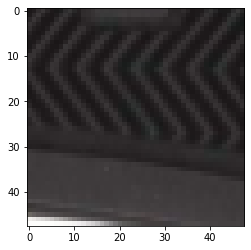

(array([ 157,  161,  788,  815, 1088, 1724, 1987, 2068, 2467, 2543, 2589,
       2591, 2697, 2859, 3143, 3265, 3391, 3547, 4036, 4058]),)
(array([ 154,  269,  289,  353,  790,  862,  944, 1268, 1424, 1544, 1701,
       1982, 2188, 2807, 3082, 3240, 3338, 3394, 3638, 3831]),)


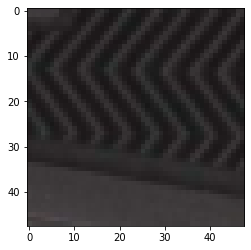

(array([ 153,  768,  815, 1088, 1602, 1724, 2068, 2418, 2467, 2484, 2589,
       2591, 2697, 3143, 3265, 3391, 3547, 3744, 4058, 4074]),)
(array([ 154,  269,  353,  828,  862,  944,  959, 1183, 1268, 1316, 1424,
       1701, 1982, 2188, 2406, 2807, 3082, 3240, 3338, 3638]),)


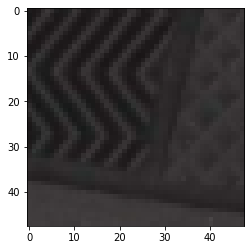

(array([ 153,  341,  484,  815, 1088, 1602, 1724, 1987, 2068, 2169, 2418,
       2484, 2589, 2591, 3265, 3547, 3664, 3744, 4036, 4058]),)
(array([ 269,  790,  828,  862,  944,  959, 1183, 1268, 1316, 1982, 2188,
       2692, 2807, 3082, 3240, 3338, 3509, 3638, 3678, 3831]),)


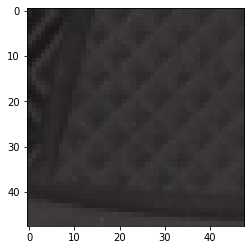

(array([  88,  153,  161,  200,  484,  742,  788,  815, 1088, 1602, 1724,
       1726, 2068, 2142, 2169, 2467, 2484, 3143, 3578, 4003]),)
(array([ 269,  565,  616,  790,  959, 1149, 1642, 1701, 1890, 1917, 2188,
       2807, 3082, 3240, 3338, 3394, 3509, 3638, 3831, 3865]),)


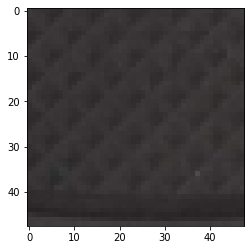

(array([ 153,  742,  768,  866, 1088, 1528, 1724, 2142, 2169, 2489, 2917,
       3143, 3477, 3578, 3781, 3810, 3881, 4003, 4014, 4058]),)
(array([ 269,  565,  616,  790,  959, 1149, 1890, 1917, 1928, 2188, 2807,
       3082, 3240, 3338, 3394, 3509, 3638, 3721, 3831, 3865]),)


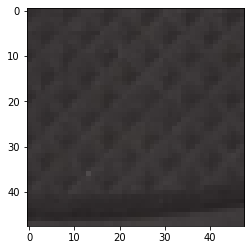

(array([ 153,  751,  768,  866,  947, 1088, 1602, 1724, 2169, 2279, 2467,
       2589, 2917, 2991, 3143, 3208, 3477, 3781, 3810, 4058]),)
(array([ 269,  282,  616,  790,  959, 1149, 1642, 1917, 1928, 2188, 2807,
       3082, 3240, 3338, 3509, 3638, 3721, 3757, 3831, 3865]),)


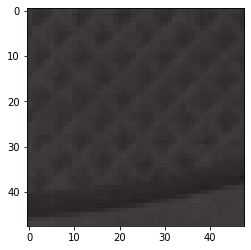

(array([ 153,  161,  200,  742,  866,  947, 1088, 1602, 1724, 2068, 2169,
       2279, 2467, 2697, 2859, 2917, 3143, 3744, 3781, 4058]),)
(array([ 269,  282,  616,  790,  959, 1149, 1917, 2188, 2524, 2807, 3082,
       3240, 3243, 3338, 3509, 3638, 3721, 3757, 3831, 3865]),)


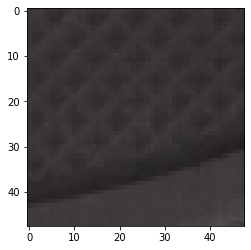

(array([ 153,  161,  866,  947, 1088, 1681, 1724, 2068, 2169, 2467, 2589,
       2680, 2697, 2859, 3143, 3265, 3647, 3744, 3810, 4058]),)
(array([ 269,  282,  790,  959, 1149, 1199, 1917, 2176, 2188, 2524, 2807,
       3082, 3240, 3243, 3338, 3509, 3638, 3721, 3757, 3831]),)


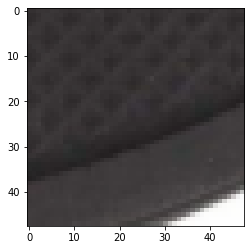

(array([ 153,  200,  751,  933,  947, 1088, 1724, 2068, 2078, 2249, 2467,
       2697, 2859, 2914, 3143, 3265, 3379, 3744, 3810, 4003]),)
(array([ 269,  282,  738, 1027, 1087, 1191, 1199, 1302, 1424, 1552, 2060,
       2188, 3069, 3240, 3243, 3509, 3638, 3721, 3757, 3831]),)


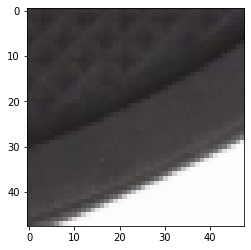

(array([ 153,  154,  161,  633,  751,  933, 1088, 1724, 1775, 2206, 2467,
       2680, 2859, 3143, 3518, 3676, 3744, 3781, 3810, 4003]),)
(array([ 269,  282,  446,  854, 1027, 1191, 1199, 1302, 1552, 1688, 1918,
       2060, 2176, 2266, 3069, 3240, 3634, 3638, 3721, 3831]),)


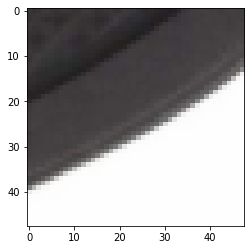

(array([ 153,  161,  390,  680,  974, 1088, 1689, 1724, 1885, 1987, 2206,
       2467, 2572, 2680, 2859, 3143, 3218, 3518, 3810, 3995]),)
(array([ 269,  282,  446,  854, 1202, 1552, 1688, 1918, 2060, 2176, 2419,
       2682, 3069, 3240, 3309, 3634, 3638, 3721, 3791, 3902]),)


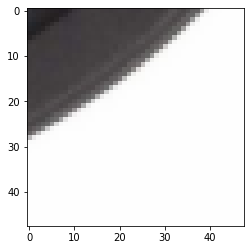

(array([ 161,  309,  390,  788, 1088, 1419, 1420, 1624, 1987, 2079, 2467,
       2838, 2859, 2865, 2937, 2984, 3218, 3265, 3772, 3810]),)
(array([ 269,  433,  446, 1109, 1392, 1544, 1552, 1918, 2060, 2411, 2419,
       2805, 3069, 3240, 3309, 3514, 3528, 3634, 3721, 3791]),)


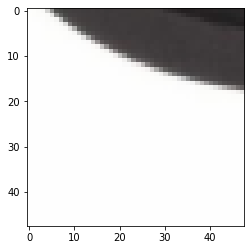

(array([ 161,  309,  431,  815, 1088, 1419, 1724, 1939, 1987, 2065, 2079,
       2467, 2984, 3265, 3346, 3692, 3772, 3810, 3985, 4003]),)
(array([ 269,  282,  384,  446,  854, 1149, 1199, 1424, 1552, 1688, 1715,
       1918, 2933, 3155, 3240, 3309, 3638, 3721, 3757, 4003]),)


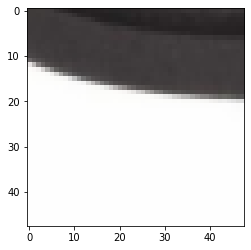

(array([  82,  431,  552, 1420, 1550, 1689, 1824, 1910, 1996, 2161, 2182,
       2330, 2614, 3265, 3346, 3520, 3651, 3682, 3772, 3810]),)
(array([  64,  154,  269,  282,  384,  446,  790,  854, 1552, 1918, 2682,
       3069, 3155, 3240, 3309, 3513, 3638, 3691, 3721, 3757]),)


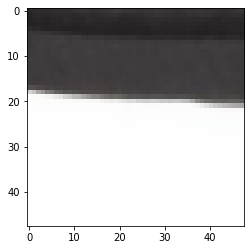

(array([ 390,  528,  618,  919, 1087, 1088, 1419, 1724, 1775, 1835, 2068,
       2206, 2418, 2443, 2859, 3143, 3265, 3518, 3772, 3810]),)
(array([  64,  269,  282,  384,  402,  446,  790,  854,  944, 1316, 1552,
       1918, 3069, 3240, 3509, 3638, 3691, 3721, 3757, 4066]),)


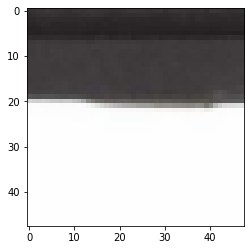

(array([ 616,  919, 1087, 1088, 1208, 1419, 1498, 1724, 1775, 1996, 2068,
       2418, 2586, 2859, 2995, 3143, 3265, 3346, 3772, 3810]),)
(array([  64,  269,  282,  384,  402,  446,  790,  944, 1149, 1552, 1918,
       3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757, 4066]),)


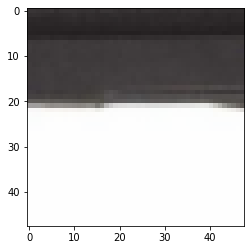

(array([ 616, 1088, 1208, 1420, 1724, 1775, 1996, 2068, 2169, 2418, 2586,
       2859, 2995, 3143, 3265, 3346, 3772, 3810, 3872, 4074]),)
(array([  64,  269,  282,  384,  446,  790,  944, 1268, 1552, 1688, 1918,
       2406, 3069, 3240, 3509, 3638, 3678, 3691, 3721, 4066]),)


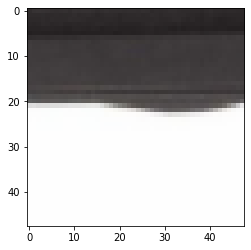

(array([ 163, 1010, 1087, 1088, 1420, 1724, 1775, 1920, 1996, 2068, 2857,
       2859, 2901, 2995, 3143, 3265, 3361, 3772, 3810, 4036]),)
(array([  64,  269,  384,  402,  446,  790,  854,  944, 1199, 1552, 1688,
       1918, 3069, 3240, 3509, 3638, 3691, 3721, 3757, 4066]),)


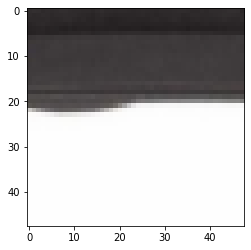

(array([ 390,  522, 1010, 1088, 1419, 1420, 1724, 1775, 1920, 1996, 2857,
       2859, 2901, 2995, 3143, 3265, 3361, 3772, 3810, 3872]),)
(array([ 269,  282,  384,  402,  427,  446,  790,  854,  944, 1552, 1688,
       1918, 2188, 3069, 3240, 3509, 3638, 3691, 3721, 3757]),)


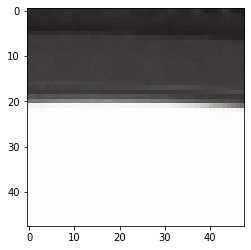

(array([ 390,  530,  943, 1010, 1088, 1419, 1420, 1724, 1775, 1920, 1983,
       1996, 2859, 2994, 2995, 3143, 3265, 3361, 3772, 4036]),)
(array([  64,  269,  282,  384,  446,  790,  862,  944, 1688, 1918, 2406,
       3069, 3240, 3509, 3634, 3638, 3691, 3721, 3757, 4066]),)


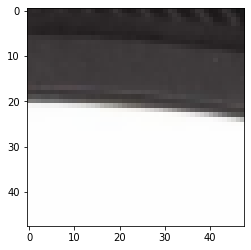

(array([ 161,  309,  390, 1010, 1088, 1404, 1419, 1420, 1724, 1775, 1973,
       1996, 2068, 2859, 2994, 2995, 3143, 3361, 3772, 4074]),)
(array([  64,  269,  282,  384,  402,  446,  790,  862,  944, 1688, 1918,
       2188, 3069, 3240, 3509, 3638, 3691, 3721, 3757, 4066]),)


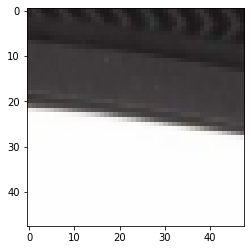

(array([ 161,  309,  579, 1010, 1088, 1419, 1420, 1724, 1987, 1996, 2859,
       3074, 3143, 3265, 3361, 3578, 3602, 3772, 4036, 4074]),)
(array([  64,  269,  384,  402,  446,  790,  854,  944, 1199, 1552, 1688,
       1918, 1947, 3069, 3240, 3638, 3678, 3691, 3721, 3757]),)


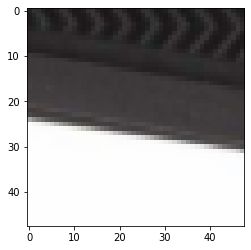

(array([ 161,  171,  309,  579, 1010, 1088, 1419, 1420, 1469, 1653, 1724,
       1987, 1996, 2859, 3143, 3195, 3602, 3772, 3812, 4036]),)
(array([  64,  269,  384,  446,  790,  854,  944, 1552, 1918, 1947, 2176,
       2406, 2758, 3069, 3240, 3605, 3638, 3678, 3691, 3721]),)


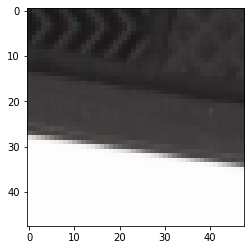

(array([ 161,  309, 1010, 1088, 1223, 1419, 1469, 1653, 1885, 1987, 2484,
       2498, 2591, 3143, 3265, 3547, 3602, 3651, 3772, 4036]),)
(array([  64,  269,  384,  402,  446,  854,  862,  944, 1552, 1918, 2176,
       3069, 3240, 3605, 3638, 3678, 3691, 3721, 3757, 3902]),)


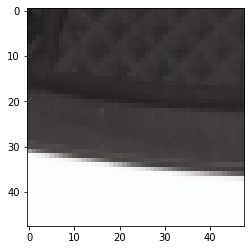

(array([ 161,  257,  309, 1088, 1420, 1624, 1987, 2068, 2169, 2467, 2484,
       2591, 2838, 3143, 3265, 3391, 3547, 3651, 3783, 4036]),)
(array([ 269,  282,  324,  384,  790,  854,  862,  944,  959, 1552, 1918,
       2188, 2406, 3069, 3240, 3638, 3678, 3691, 3721, 3757]),)


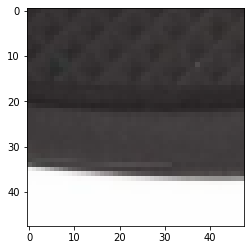

(array([  67, 1088, 1420, 1624, 1653, 1763, 1885, 2068, 2169, 2591, 2859,
       3143, 3265, 3391, 3547, 3651, 3772, 3783, 3795, 4036]),)
(array([ 269,  384,  790,  854,  862,  944,  959, 1552, 1918, 2188, 2406,
       3069, 3240, 3486, 3509, 3638, 3678, 3691, 3721, 3757]),)


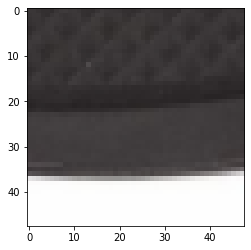

(array([  67,  495,  788, 1088, 1420, 1624, 1653, 1885, 1987, 2068, 2169,
       2467, 2591, 2859, 3143, 3265, 3391, 3651, 3772, 4036]),)
(array([ 269,  384,  790,  862,  944,  959, 1199, 1552, 1918, 2188, 2406,
       3069, 3240, 3509, 3638, 3678, 3691, 3721, 3757, 4066]),)


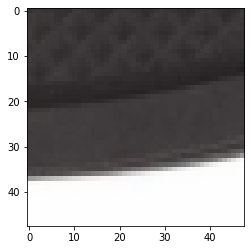

(array([ 309,  390,  495, 1088, 1420, 1624, 1653, 1987, 2068, 2380, 2591,
       2838, 2859, 3143, 3391, 3547, 3651, 3772, 3795, 4036]),)
(array([ 269,  282,  324,  384,  854,  862,  944, 1199, 1552, 1918, 2152,
       2176, 2188, 3069, 3240, 3509, 3638, 3691, 3721, 3757]),)


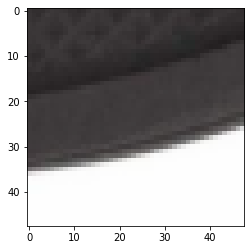

(array([ 161,  309,  788, 1088, 1235, 1420, 1624, 1653, 1987, 2467, 2838,
       2859, 3072, 3143, 3218, 3265, 3547, 3772, 3795, 4036]),)
(array([ 269,  282,  324,  402,  446,  854, 1027, 1199, 1408, 1552, 1918,
       2152, 2188, 3069, 3240, 3509, 3638, 3691, 3721, 3757]),)


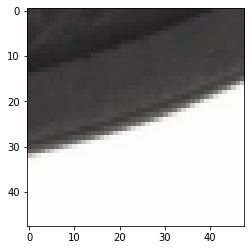

(array([ 116,  161,  309, 1088, 1235, 1653, 1689, 1987, 2079, 2329, 2838,
       2859, 2937, 3218, 3265, 3408, 3547, 3692, 3772, 4012]),)
(array([ 269,  282,  402,  446,  790,  854, 1027, 1199, 1552, 1918, 2188,
       2682, 3069, 3240, 3309, 3634, 3638, 3721, 3791, 3831]),)


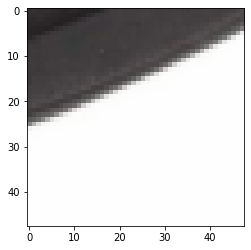

(array([ 161,  815, 1088, 1235, 1602, 1689, 1724, 1987, 2329, 2467, 2937,
       3265, 3408, 3495, 3574, 3651, 3772, 3810, 4012, 4036]),)
(array([ 269,  282,  433,  446,  854, 1544, 1552, 1918, 2419, 2805, 2836,
       3069, 3167, 3240, 3309, 3634, 3638, 3721, 3791, 3902]),)


In [8]:
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt
from skimage.util.shape import view_as_windows
from skimage.transform import resize

conf_stepSize = 24
conf_patchSize = 48

with open ('/content/drive/My Drive/MDPM/output/shoes_trim/imageDict.pkl', 'rb') as f:
  imageDict = pickle.load (f)
with open ('/content/drive/My Drive/MDPM/output/shoes_trim/indexImg.pkl', 'rb') as f:
  indexImg = np.array(pickle.load (f))
with open ('/content/drive/My Drive/MDPM/output/shoes_trim/invertFile.npy', 'rb') as f:
  invertFile = np.load (f)

with open ('/content/drive/My Drive/MDPM/output/shoes_trim_fc7/invertFile.npy', 'rb') as f:
  invertFile_fc7 = np.load (f)


p = "/content/drive/My Drive/MDPM/data/shoes/image/127811_zappos_20181018_9124097_image0000.jpg"
for i in imageDict:
  if imageDict[i] == p:
    r = i

I = plt.imread(p)
if I.dtype == np.uint8:
  I = I.astype('<f')
# print (np.mean(I, (0,1)))
imHeight, imWidth, imDepth = I.shape
if imHeight > imWidth:
  new_ht = int((256/float(imWidth))*imHeight)
  I = resize(I, (new_ht, 256))
else:
  new_width = int((256/float(imHeight)) * imWidth)
  I = resize(I, (256, new_width))
plt.imshow(I/256)
plt.show()

patches = view_as_windows(I, (conf_patchSize, conf_patchSize,3), step=conf_stepSize)
print (r, np.where(indexImg == r)[0][0])
pin = patchID = np.where(indexImg == r)[0][0]

count = 0
for i in range(patches.shape[0]):
  for j in range(patches.shape[1]):
    pch = patches[i][j][0]
    pch = np.sum(pch, axis=2)
    # print (pch.size, np.nonzero(pch-255)[0].size, int(0.2*pch.size))
    if np.nonzero(pch-765.0)[0].size > int(0.2*pch.size):
      # count += 1
      plt.imshow(patches[i][j][0]/256)
      plt.show()
      print (np.nonzero(invertFile[:,patchID]))
      print (np.nonzero(invertFile_fc7[:,count]))
      patchID += 1
      count += 1
      # break
# print(patchID - pin)

In [5]:
with open ('/content/drive/My Drive/MDPM/output/shoes_trim/invertFile.npy', 'rb') as f:
  invertFile = np.load (f)

with open ('/content/drive/My Drive/MDPM/output/shoes_trim_fc7/invertFile.npy', 'rb') as f:
  invertFile_fc7 = np.load (f)

invertFile_fc7.shape

(4096, 178)